In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, relu, tanh
from tensorflow.keras import layers
from tensorflow.keras import initializers
import tensorflow.keras.utils
import sys

In [2]:
sys.path.append('/home/raffaele/Documents/ml-project/src/')

In [3]:
from utility import *

## import dataset

In [4]:
Xtrain, Xtest, ytrain, ytest = load_monk("1")

In [5]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(124, 17)
(432, 17)
(124, 1)
(432, 1)


In [6]:
# from sklearn.model_selection import train_test_split

# Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

## Define Models

### Model 1

first model:  
    17->3->1  
    SGD  
    lr = 0.01  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [7]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh,
#                kernel_initializer=initializers.GlorotUniform(),
#                bias_initializer=initializers.Zeros(),
               # kernel_regularizer=L2
               ))
model.add(tf.keras.layers.Dense(1, activation=tanh,
#                 kernel_initializer=initializers.GlorotUniform(),
#                 bias_initializer=initializers.Zeros(),
                # kernel_regularizer=L2
               ))

In [8]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [9]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
#                     validation_steps=5,
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 1.2649 - accuracy: 0.5301 - val_loss: 1.2705 - val_accuracy: 0.5161
Epoch 2/1000
1/1 - 0s - loss: 1.2215 - accuracy: 0.5347 - val_loss: 1.2268 - val_accuracy: 0.5161
Epoch 3/1000
1/1 - 0s - loss: 1.1783 - accuracy: 0.5394 - val_loss: 1.1831 - val_accuracy: 0.5161
Epoch 4/1000
1/1 - 0s - loss: 1.1354 - accuracy: 0.5417 - val_loss: 1.1396 - val_accuracy: 0.5081
Epoch 5/1000
1/1 - 0s - loss: 1.0929 - accuracy: 0.5417 - val_loss: 1.0966 - val_accuracy: 0.5161
Epoch 6/1000
1/1 - 0s - loss: 1.0511 - accuracy: 0.5417 - val_loss: 1.0542 - val_accuracy: 0.5161
Epoch 7/1000
1/1 - 0s - loss: 1.0101 - accuracy: 0.5440 - val_loss: 1.0125 - val_accuracy: 0.5161
Epoch 8/1000
1/1 - 0s - loss: 0.9700 - accuracy: 0.5417 - val_loss: 0.9717 - val_accuracy: 0.5242
Epoch 9/1000
1/1 - 0s - loss: 0.9311 - accuracy: 0.5556 - val_loss: 0.9321 - val_accuracy: 0.5484
Epoch 10/1000
1/1 - 0s - loss: 0.8932 - accuracy: 0.5602 - val_loss: 0.8936 - val_accuracy: 0.5484
Epoch 11/1000
1/1 -

Epoch 84/1000
1/1 - 0s - loss: 0.2897 - accuracy: 0.5741 - val_loss: 0.2804 - val_accuracy: 0.5968
Epoch 85/1000
1/1 - 0s - loss: 0.2891 - accuracy: 0.5741 - val_loss: 0.2798 - val_accuracy: 0.6048
Epoch 86/1000
1/1 - 0s - loss: 0.2885 - accuracy: 0.5810 - val_loss: 0.2793 - val_accuracy: 0.6129
Epoch 87/1000
1/1 - 0s - loss: 0.2879 - accuracy: 0.5810 - val_loss: 0.2787 - val_accuracy: 0.6129
Epoch 88/1000
1/1 - 0s - loss: 0.2874 - accuracy: 0.5810 - val_loss: 0.2782 - val_accuracy: 0.6129
Epoch 89/1000
1/1 - 0s - loss: 0.2868 - accuracy: 0.5833 - val_loss: 0.2777 - val_accuracy: 0.6210
Epoch 90/1000
1/1 - 0s - loss: 0.2863 - accuracy: 0.5856 - val_loss: 0.2772 - val_accuracy: 0.6210
Epoch 91/1000
1/1 - 0s - loss: 0.2858 - accuracy: 0.5856 - val_loss: 0.2767 - val_accuracy: 0.6210
Epoch 92/1000
1/1 - 0s - loss: 0.2852 - accuracy: 0.5880 - val_loss: 0.2762 - val_accuracy: 0.6210
Epoch 93/1000
1/1 - 0s - loss: 0.2847 - accuracy: 0.5880 - val_loss: 0.2757 - val_accuracy: 0.6210
Epoch 94/1

1/1 - 0s - loss: 0.2551 - accuracy: 0.6181 - val_loss: 0.2485 - val_accuracy: 0.6452
Epoch 167/1000
1/1 - 0s - loss: 0.2547 - accuracy: 0.6181 - val_loss: 0.2482 - val_accuracy: 0.6452
Epoch 168/1000
1/1 - 0s - loss: 0.2544 - accuracy: 0.6181 - val_loss: 0.2479 - val_accuracy: 0.6452
Epoch 169/1000
1/1 - 0s - loss: 0.2540 - accuracy: 0.6204 - val_loss: 0.2476 - val_accuracy: 0.6452
Epoch 170/1000
1/1 - 0s - loss: 0.2537 - accuracy: 0.6204 - val_loss: 0.2473 - val_accuracy: 0.6452
Epoch 171/1000
1/1 - 0s - loss: 0.2533 - accuracy: 0.6181 - val_loss: 0.2470 - val_accuracy: 0.6452
Epoch 172/1000
1/1 - 0s - loss: 0.2530 - accuracy: 0.6181 - val_loss: 0.2467 - val_accuracy: 0.6452
Epoch 173/1000
1/1 - 0s - loss: 0.2527 - accuracy: 0.6204 - val_loss: 0.2464 - val_accuracy: 0.6452
Epoch 174/1000
1/1 - 0s - loss: 0.2523 - accuracy: 0.6204 - val_loss: 0.2461 - val_accuracy: 0.6452
Epoch 175/1000
1/1 - 0s - loss: 0.2520 - accuracy: 0.6204 - val_loss: 0.2458 - val_accuracy: 0.6452
Epoch 176/1000


1/1 - 0s - loss: 0.2306 - accuracy: 0.6551 - val_loss: 0.2276 - val_accuracy: 0.6694
Epoch 249/1000
1/1 - 0s - loss: 0.2304 - accuracy: 0.6551 - val_loss: 0.2274 - val_accuracy: 0.6694
Epoch 250/1000
1/1 - 0s - loss: 0.2301 - accuracy: 0.6551 - val_loss: 0.2272 - val_accuracy: 0.6694
Epoch 251/1000
1/1 - 0s - loss: 0.2299 - accuracy: 0.6551 - val_loss: 0.2270 - val_accuracy: 0.6694
Epoch 252/1000
1/1 - 0s - loss: 0.2296 - accuracy: 0.6551 - val_loss: 0.2268 - val_accuracy: 0.6694
Epoch 253/1000
1/1 - 0s - loss: 0.2294 - accuracy: 0.6551 - val_loss: 0.2265 - val_accuracy: 0.6694
Epoch 254/1000
1/1 - 0s - loss: 0.2292 - accuracy: 0.6574 - val_loss: 0.2263 - val_accuracy: 0.6613
Epoch 255/1000
1/1 - 0s - loss: 0.2289 - accuracy: 0.6551 - val_loss: 0.2261 - val_accuracy: 0.6613
Epoch 256/1000
1/1 - 0s - loss: 0.2287 - accuracy: 0.6551 - val_loss: 0.2259 - val_accuracy: 0.6613
Epoch 257/1000
1/1 - 0s - loss: 0.2284 - accuracy: 0.6551 - val_loss: 0.2257 - val_accuracy: 0.6613
Epoch 258/1000


1/1 - 0s - loss: 0.2130 - accuracy: 0.6574 - val_loss: 0.2128 - val_accuracy: 0.6532
Epoch 331/1000
1/1 - 0s - loss: 0.2128 - accuracy: 0.6574 - val_loss: 0.2127 - val_accuracy: 0.6613
Epoch 332/1000
1/1 - 0s - loss: 0.2126 - accuracy: 0.6597 - val_loss: 0.2125 - val_accuracy: 0.6613
Epoch 333/1000
1/1 - 0s - loss: 0.2125 - accuracy: 0.6597 - val_loss: 0.2124 - val_accuracy: 0.6613
Epoch 334/1000
1/1 - 0s - loss: 0.2123 - accuracy: 0.6597 - val_loss: 0.2122 - val_accuracy: 0.6613
Epoch 335/1000
1/1 - 0s - loss: 0.2121 - accuracy: 0.6597 - val_loss: 0.2121 - val_accuracy: 0.6532
Epoch 336/1000
1/1 - 0s - loss: 0.2119 - accuracy: 0.6574 - val_loss: 0.2119 - val_accuracy: 0.6532
Epoch 337/1000
1/1 - 0s - loss: 0.2117 - accuracy: 0.6551 - val_loss: 0.2118 - val_accuracy: 0.6532
Epoch 338/1000
1/1 - 0s - loss: 0.2116 - accuracy: 0.6551 - val_loss: 0.2116 - val_accuracy: 0.6532
Epoch 339/1000
1/1 - 0s - loss: 0.2114 - accuracy: 0.6551 - val_loss: 0.2115 - val_accuracy: 0.6532
Epoch 340/1000


1/1 - 0s - loss: 0.2001 - accuracy: 0.6620 - val_loss: 0.2019 - val_accuracy: 0.6452
Epoch 413/1000
1/1 - 0s - loss: 0.1999 - accuracy: 0.6620 - val_loss: 0.2018 - val_accuracy: 0.6452
Epoch 414/1000
1/1 - 0s - loss: 0.1998 - accuracy: 0.6620 - val_loss: 0.2017 - val_accuracy: 0.6452
Epoch 415/1000
1/1 - 0s - loss: 0.1997 - accuracy: 0.6620 - val_loss: 0.2016 - val_accuracy: 0.6452
Epoch 416/1000
1/1 - 0s - loss: 0.1995 - accuracy: 0.6620 - val_loss: 0.2014 - val_accuracy: 0.6452
Epoch 417/1000
1/1 - 0s - loss: 0.1994 - accuracy: 0.6620 - val_loss: 0.2013 - val_accuracy: 0.6452
Epoch 418/1000
1/1 - 0s - loss: 0.1993 - accuracy: 0.6620 - val_loss: 0.2012 - val_accuracy: 0.6452
Epoch 419/1000
1/1 - 0s - loss: 0.1991 - accuracy: 0.6620 - val_loss: 0.2011 - val_accuracy: 0.6452
Epoch 420/1000
1/1 - 0s - loss: 0.1990 - accuracy: 0.6620 - val_loss: 0.2010 - val_accuracy: 0.6452
Epoch 421/1000
1/1 - 0s - loss: 0.1989 - accuracy: 0.6620 - val_loss: 0.2009 - val_accuracy: 0.6452
Epoch 422/1000


1/1 - 0s - loss: 0.1904 - accuracy: 0.6829 - val_loss: 0.1935 - val_accuracy: 0.6694
Epoch 495/1000
1/1 - 0s - loss: 0.1903 - accuracy: 0.6852 - val_loss: 0.1934 - val_accuracy: 0.6694
Epoch 496/1000
1/1 - 0s - loss: 0.1902 - accuracy: 0.6898 - val_loss: 0.1934 - val_accuracy: 0.6694
Epoch 497/1000
1/1 - 0s - loss: 0.1901 - accuracy: 0.6898 - val_loss: 0.1933 - val_accuracy: 0.6694
Epoch 498/1000
1/1 - 0s - loss: 0.1900 - accuracy: 0.6898 - val_loss: 0.1932 - val_accuracy: 0.6694
Epoch 499/1000
1/1 - 0s - loss: 0.1899 - accuracy: 0.6898 - val_loss: 0.1931 - val_accuracy: 0.6694
Epoch 500/1000
1/1 - 0s - loss: 0.1898 - accuracy: 0.6898 - val_loss: 0.1930 - val_accuracy: 0.6694
Epoch 501/1000
1/1 - 0s - loss: 0.1897 - accuracy: 0.6898 - val_loss: 0.1929 - val_accuracy: 0.6694
Epoch 502/1000
1/1 - 0s - loss: 0.1896 - accuracy: 0.6898 - val_loss: 0.1928 - val_accuracy: 0.6694
Epoch 503/1000
1/1 - 0s - loss: 0.1895 - accuracy: 0.6921 - val_loss: 0.1927 - val_accuracy: 0.6694
Epoch 504/1000


1/1 - 0s - loss: 0.1833 - accuracy: 0.7130 - val_loss: 0.1871 - val_accuracy: 0.6935
Epoch 577/1000
1/1 - 0s - loss: 0.1832 - accuracy: 0.7130 - val_loss: 0.1871 - val_accuracy: 0.6935
Epoch 578/1000
1/1 - 0s - loss: 0.1831 - accuracy: 0.7130 - val_loss: 0.1870 - val_accuracy: 0.6935
Epoch 579/1000
1/1 - 0s - loss: 0.1830 - accuracy: 0.7130 - val_loss: 0.1869 - val_accuracy: 0.7016
Epoch 580/1000
1/1 - 0s - loss: 0.1830 - accuracy: 0.7153 - val_loss: 0.1869 - val_accuracy: 0.7016
Epoch 581/1000
1/1 - 0s - loss: 0.1829 - accuracy: 0.7153 - val_loss: 0.1868 - val_accuracy: 0.7016
Epoch 582/1000
1/1 - 0s - loss: 0.1828 - accuracy: 0.7153 - val_loss: 0.1867 - val_accuracy: 0.7016
Epoch 583/1000
1/1 - 0s - loss: 0.1828 - accuracy: 0.7153 - val_loss: 0.1867 - val_accuracy: 0.7097
Epoch 584/1000
1/1 - 0s - loss: 0.1827 - accuracy: 0.7176 - val_loss: 0.1866 - val_accuracy: 0.7097
Epoch 585/1000
1/1 - 0s - loss: 0.1826 - accuracy: 0.7176 - val_loss: 0.1866 - val_accuracy: 0.7097
Epoch 586/1000


1/1 - 0s - loss: 0.1780 - accuracy: 0.7431 - val_loss: 0.1823 - val_accuracy: 0.7258
Epoch 659/1000
1/1 - 0s - loss: 0.1779 - accuracy: 0.7431 - val_loss: 0.1823 - val_accuracy: 0.7258
Epoch 660/1000
1/1 - 0s - loss: 0.1779 - accuracy: 0.7431 - val_loss: 0.1822 - val_accuracy: 0.7339
Epoch 661/1000
1/1 - 0s - loss: 0.1778 - accuracy: 0.7454 - val_loss: 0.1822 - val_accuracy: 0.7339
Epoch 662/1000
1/1 - 0s - loss: 0.1778 - accuracy: 0.7454 - val_loss: 0.1821 - val_accuracy: 0.7339
Epoch 663/1000
1/1 - 0s - loss: 0.1777 - accuracy: 0.7454 - val_loss: 0.1821 - val_accuracy: 0.7339
Epoch 664/1000
1/1 - 0s - loss: 0.1777 - accuracy: 0.7477 - val_loss: 0.1820 - val_accuracy: 0.7339
Epoch 665/1000
1/1 - 0s - loss: 0.1776 - accuracy: 0.7477 - val_loss: 0.1820 - val_accuracy: 0.7339
Epoch 666/1000
1/1 - 0s - loss: 0.1775 - accuracy: 0.7454 - val_loss: 0.1820 - val_accuracy: 0.7339
Epoch 667/1000
1/1 - 0s - loss: 0.1775 - accuracy: 0.7454 - val_loss: 0.1819 - val_accuracy: 0.7339
Epoch 668/1000


1/1 - 0s - loss: 0.1741 - accuracy: 0.7523 - val_loss: 0.1788 - val_accuracy: 0.7419
Epoch 741/1000
1/1 - 0s - loss: 0.1740 - accuracy: 0.7523 - val_loss: 0.1787 - val_accuracy: 0.7419
Epoch 742/1000
1/1 - 0s - loss: 0.1740 - accuracy: 0.7523 - val_loss: 0.1787 - val_accuracy: 0.7419
Epoch 743/1000
1/1 - 0s - loss: 0.1740 - accuracy: 0.7523 - val_loss: 0.1787 - val_accuracy: 0.7419
Epoch 744/1000
1/1 - 0s - loss: 0.1739 - accuracy: 0.7523 - val_loss: 0.1786 - val_accuracy: 0.7419
Epoch 745/1000
1/1 - 0s - loss: 0.1739 - accuracy: 0.7523 - val_loss: 0.1786 - val_accuracy: 0.7419
Epoch 746/1000
1/1 - 0s - loss: 0.1738 - accuracy: 0.7523 - val_loss: 0.1786 - val_accuracy: 0.7419
Epoch 747/1000
1/1 - 0s - loss: 0.1738 - accuracy: 0.7523 - val_loss: 0.1785 - val_accuracy: 0.7419
Epoch 748/1000
1/1 - 0s - loss: 0.1738 - accuracy: 0.7523 - val_loss: 0.1785 - val_accuracy: 0.7419
Epoch 749/1000
1/1 - 0s - loss: 0.1737 - accuracy: 0.7523 - val_loss: 0.1785 - val_accuracy: 0.7419
Epoch 750/1000


1/1 - 0s - loss: 0.1712 - accuracy: 0.7569 - val_loss: 0.1761 - val_accuracy: 0.7500
Epoch 823/1000
1/1 - 0s - loss: 0.1711 - accuracy: 0.7546 - val_loss: 0.1761 - val_accuracy: 0.7500
Epoch 824/1000
1/1 - 0s - loss: 0.1711 - accuracy: 0.7546 - val_loss: 0.1761 - val_accuracy: 0.7500
Epoch 825/1000
1/1 - 0s - loss: 0.1711 - accuracy: 0.7546 - val_loss: 0.1760 - val_accuracy: 0.7500
Epoch 826/1000
1/1 - 0s - loss: 0.1710 - accuracy: 0.7546 - val_loss: 0.1760 - val_accuracy: 0.7500
Epoch 827/1000
1/1 - 0s - loss: 0.1710 - accuracy: 0.7546 - val_loss: 0.1760 - val_accuracy: 0.7500
Epoch 828/1000
1/1 - 0s - loss: 0.1710 - accuracy: 0.7546 - val_loss: 0.1760 - val_accuracy: 0.7500
Epoch 829/1000
1/1 - 0s - loss: 0.1710 - accuracy: 0.7546 - val_loss: 0.1759 - val_accuracy: 0.7500
Epoch 830/1000
1/1 - 0s - loss: 0.1709 - accuracy: 0.7546 - val_loss: 0.1759 - val_accuracy: 0.7500
Epoch 831/1000
1/1 - 0s - loss: 0.1709 - accuracy: 0.7546 - val_loss: 0.1759 - val_accuracy: 0.7500
Epoch 832/1000


1/1 - 0s - loss: 0.1689 - accuracy: 0.7407 - val_loss: 0.1741 - val_accuracy: 0.7258
Epoch 905/1000
1/1 - 0s - loss: 0.1689 - accuracy: 0.7407 - val_loss: 0.1741 - val_accuracy: 0.7258
Epoch 906/1000
1/1 - 0s - loss: 0.1688 - accuracy: 0.7407 - val_loss: 0.1740 - val_accuracy: 0.7258
Epoch 907/1000
1/1 - 0s - loss: 0.1688 - accuracy: 0.7407 - val_loss: 0.1740 - val_accuracy: 0.7258
Epoch 908/1000
1/1 - 0s - loss: 0.1688 - accuracy: 0.7407 - val_loss: 0.1740 - val_accuracy: 0.7258
Epoch 909/1000
1/1 - 0s - loss: 0.1688 - accuracy: 0.7407 - val_loss: 0.1740 - val_accuracy: 0.7258
Epoch 910/1000
1/1 - 0s - loss: 0.1687 - accuracy: 0.7407 - val_loss: 0.1739 - val_accuracy: 0.7258
Epoch 911/1000
1/1 - 0s - loss: 0.1687 - accuracy: 0.7407 - val_loss: 0.1739 - val_accuracy: 0.7258
Epoch 912/1000
1/1 - 0s - loss: 0.1687 - accuracy: 0.7407 - val_loss: 0.1739 - val_accuracy: 0.7258
Epoch 913/1000
1/1 - 0s - loss: 0.1687 - accuracy: 0.7407 - val_loss: 0.1739 - val_accuracy: 0.7258
Epoch 914/1000


1/1 - 0s - loss: 0.1670 - accuracy: 0.7500 - val_loss: 0.1724 - val_accuracy: 0.7339
Epoch 987/1000
1/1 - 0s - loss: 0.1670 - accuracy: 0.7500 - val_loss: 0.1724 - val_accuracy: 0.7339
Epoch 988/1000
1/1 - 0s - loss: 0.1670 - accuracy: 0.7500 - val_loss: 0.1724 - val_accuracy: 0.7339
Epoch 989/1000
1/1 - 0s - loss: 0.1669 - accuracy: 0.7500 - val_loss: 0.1724 - val_accuracy: 0.7339
Epoch 990/1000
1/1 - 0s - loss: 0.1669 - accuracy: 0.7500 - val_loss: 0.1723 - val_accuracy: 0.7339
Epoch 991/1000
1/1 - 0s - loss: 0.1669 - accuracy: 0.7500 - val_loss: 0.1723 - val_accuracy: 0.7339
Epoch 992/1000
1/1 - 0s - loss: 0.1669 - accuracy: 0.7500 - val_loss: 0.1723 - val_accuracy: 0.7339
Epoch 993/1000
1/1 - 0s - loss: 0.1669 - accuracy: 0.7500 - val_loss: 0.1723 - val_accuracy: 0.7339
Epoch 994/1000
1/1 - 0s - loss: 0.1668 - accuracy: 0.7500 - val_loss: 0.1723 - val_accuracy: 0.7339
Epoch 995/1000
1/1 - 0s - loss: 0.1668 - accuracy: 0.7500 - val_loss: 0.1722 - val_accuracy: 0.7339
Epoch 996/1000


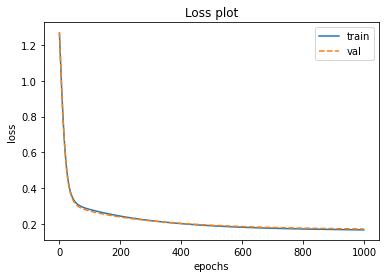

In [10]:
plot_loss(history)

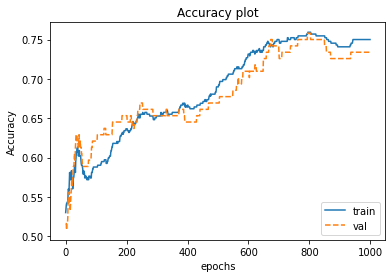

In [11]:
plot_accuracy(history)

In [12]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1667090|	0.75|
Test	|0.1721571|	0.73|


from the plot of the loss it seem that this model is slowing down too much slow so try to increase the learning rate and see if it go better and don't overfit.

## Model 2

first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [13]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [14]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.9790 - accuracy: 0.5000 - val_loss: 0.5478 - val_accuracy: 0.4919
Epoch 2/1000
1/1 - 0s - loss: 0.5630 - accuracy: 0.4907 - val_loss: 0.3588 - val_accuracy: 0.5403
Epoch 3/1000
1/1 - 0s - loss: 0.3765 - accuracy: 0.5301 - val_loss: 0.2939 - val_accuracy: 0.5887
Epoch 4/1000
1/1 - 0s - loss: 0.3104 - accuracy: 0.5301 - val_loss: 0.2693 - val_accuracy: 0.6290
Epoch 5/1000
1/1 - 0s - loss: 0.2844 - accuracy: 0.5509 - val_loss: 0.2583 - val_accuracy: 0.6371
Epoch 6/1000
1/1 - 0s - loss: 0.2721 - accuracy: 0.5556 - val_loss: 0.2526 - val_accuracy: 0.6210
Epoch 7/1000
1/1 - 0s - loss: 0.2653 - accuracy: 0.5532 - val_loss: 0.2491 - val_accuracy: 0.5968
Epoch 8/1000
1/1 - 0s - loss: 0.2610 - accuracy: 0.5509 - val_loss: 0.2466 - val_accuracy: 0.5968
Epoch 9/1000
1/1 - 0s - loss: 0.2578 - accuracy: 0.5463 - val_loss: 0.2447 - val_accuracy: 0.5887
Epoch 10/1000
1/1 - 0s - loss: 0.2553 - accuracy: 0.5509 - val_loss: 0.2430 - val_accuracy: 0.5887
Epoch 11/1000
1/1 -

Epoch 84/1000
1/1 - 0s - loss: 0.1935 - accuracy: 0.6898 - val_loss: 0.1960 - val_accuracy: 0.6935
Epoch 85/1000
1/1 - 0s - loss: 0.1931 - accuracy: 0.6944 - val_loss: 0.1956 - val_accuracy: 0.6935
Epoch 86/1000
1/1 - 0s - loss: 0.1927 - accuracy: 0.6968 - val_loss: 0.1953 - val_accuracy: 0.6935
Epoch 87/1000
1/1 - 0s - loss: 0.1923 - accuracy: 0.6968 - val_loss: 0.1949 - val_accuracy: 0.6935
Epoch 88/1000
1/1 - 0s - loss: 0.1919 - accuracy: 0.6968 - val_loss: 0.1946 - val_accuracy: 0.7016
Epoch 89/1000
1/1 - 0s - loss: 0.1915 - accuracy: 0.6991 - val_loss: 0.1943 - val_accuracy: 0.7097
Epoch 90/1000
1/1 - 0s - loss: 0.1911 - accuracy: 0.6991 - val_loss: 0.1939 - val_accuracy: 0.7097
Epoch 91/1000
1/1 - 0s - loss: 0.1907 - accuracy: 0.6991 - val_loss: 0.1936 - val_accuracy: 0.7177
Epoch 92/1000
1/1 - 0s - loss: 0.1904 - accuracy: 0.7037 - val_loss: 0.1933 - val_accuracy: 0.7258
Epoch 93/1000
1/1 - 0s - loss: 0.1900 - accuracy: 0.7106 - val_loss: 0.1929 - val_accuracy: 0.7258
Epoch 94/1

1/1 - 0s - loss: 0.1744 - accuracy: 0.7384 - val_loss: 0.1784 - val_accuracy: 0.7339
Epoch 167/1000
1/1 - 0s - loss: 0.1743 - accuracy: 0.7384 - val_loss: 0.1783 - val_accuracy: 0.7339
Epoch 168/1000
1/1 - 0s - loss: 0.1742 - accuracy: 0.7431 - val_loss: 0.1782 - val_accuracy: 0.7339
Epoch 169/1000
1/1 - 0s - loss: 0.1741 - accuracy: 0.7431 - val_loss: 0.1781 - val_accuracy: 0.7339
Epoch 170/1000
1/1 - 0s - loss: 0.1739 - accuracy: 0.7431 - val_loss: 0.1780 - val_accuracy: 0.7339
Epoch 171/1000
1/1 - 0s - loss: 0.1738 - accuracy: 0.7454 - val_loss: 0.1779 - val_accuracy: 0.7339
Epoch 172/1000
1/1 - 0s - loss: 0.1737 - accuracy: 0.7454 - val_loss: 0.1777 - val_accuracy: 0.7339
Epoch 173/1000
1/1 - 0s - loss: 0.1736 - accuracy: 0.7454 - val_loss: 0.1776 - val_accuracy: 0.7339
Epoch 174/1000
1/1 - 0s - loss: 0.1735 - accuracy: 0.7454 - val_loss: 0.1775 - val_accuracy: 0.7339
Epoch 175/1000
1/1 - 0s - loss: 0.1734 - accuracy: 0.7454 - val_loss: 0.1774 - val_accuracy: 0.7339
Epoch 176/1000


1/1 - 0s - loss: 0.1671 - accuracy: 0.7500 - val_loss: 0.1713 - val_accuracy: 0.7339
Epoch 249/1000
1/1 - 0s - loss: 0.1671 - accuracy: 0.7500 - val_loss: 0.1713 - val_accuracy: 0.7339
Epoch 250/1000
1/1 - 0s - loss: 0.1670 - accuracy: 0.7500 - val_loss: 0.1712 - val_accuracy: 0.7339
Epoch 251/1000
1/1 - 0s - loss: 0.1669 - accuracy: 0.7500 - val_loss: 0.1711 - val_accuracy: 0.7339
Epoch 252/1000
1/1 - 0s - loss: 0.1668 - accuracy: 0.7500 - val_loss: 0.1710 - val_accuracy: 0.7339
Epoch 253/1000
1/1 - 0s - loss: 0.1668 - accuracy: 0.7500 - val_loss: 0.1710 - val_accuracy: 0.7339
Epoch 254/1000
1/1 - 0s - loss: 0.1667 - accuracy: 0.7500 - val_loss: 0.1709 - val_accuracy: 0.7339
Epoch 255/1000
1/1 - 0s - loss: 0.1666 - accuracy: 0.7500 - val_loss: 0.1708 - val_accuracy: 0.7339
Epoch 256/1000
1/1 - 0s - loss: 0.1665 - accuracy: 0.7500 - val_loss: 0.1707 - val_accuracy: 0.7339
Epoch 257/1000
1/1 - 0s - loss: 0.1665 - accuracy: 0.7500 - val_loss: 0.1707 - val_accuracy: 0.7339
Epoch 258/1000


1/1 - 0s - loss: 0.1599 - accuracy: 0.7500 - val_loss: 0.1637 - val_accuracy: 0.7339
Epoch 331/1000
1/1 - 0s - loss: 0.1598 - accuracy: 0.7500 - val_loss: 0.1636 - val_accuracy: 0.7339
Epoch 332/1000
1/1 - 0s - loss: 0.1597 - accuracy: 0.7500 - val_loss: 0.1635 - val_accuracy: 0.7339
Epoch 333/1000
1/1 - 0s - loss: 0.1596 - accuracy: 0.7500 - val_loss: 0.1633 - val_accuracy: 0.7339
Epoch 334/1000
1/1 - 0s - loss: 0.1595 - accuracy: 0.7500 - val_loss: 0.1632 - val_accuracy: 0.7339
Epoch 335/1000
1/1 - 0s - loss: 0.1594 - accuracy: 0.7500 - val_loss: 0.1631 - val_accuracy: 0.7339
Epoch 336/1000
1/1 - 0s - loss: 0.1592 - accuracy: 0.7500 - val_loss: 0.1629 - val_accuracy: 0.7339
Epoch 337/1000
1/1 - 0s - loss: 0.1591 - accuracy: 0.7500 - val_loss: 0.1628 - val_accuracy: 0.7339
Epoch 338/1000
1/1 - 0s - loss: 0.1590 - accuracy: 0.7500 - val_loss: 0.1627 - val_accuracy: 0.7339
Epoch 339/1000
1/1 - 0s - loss: 0.1589 - accuracy: 0.7500 - val_loss: 0.1625 - val_accuracy: 0.7339
Epoch 340/1000


1/1 - 0s - loss: 0.1466 - accuracy: 0.7523 - val_loss: 0.1488 - val_accuracy: 0.7339
Epoch 413/1000
1/1 - 0s - loss: 0.1464 - accuracy: 0.7523 - val_loss: 0.1486 - val_accuracy: 0.7339
Epoch 414/1000
1/1 - 0s - loss: 0.1462 - accuracy: 0.7523 - val_loss: 0.1483 - val_accuracy: 0.7339
Epoch 415/1000
1/1 - 0s - loss: 0.1460 - accuracy: 0.7523 - val_loss: 0.1481 - val_accuracy: 0.7339
Epoch 416/1000
1/1 - 0s - loss: 0.1457 - accuracy: 0.7523 - val_loss: 0.1478 - val_accuracy: 0.7339
Epoch 417/1000
1/1 - 0s - loss: 0.1455 - accuracy: 0.7546 - val_loss: 0.1476 - val_accuracy: 0.7339
Epoch 418/1000
1/1 - 0s - loss: 0.1453 - accuracy: 0.7546 - val_loss: 0.1473 - val_accuracy: 0.7339
Epoch 419/1000
1/1 - 0s - loss: 0.1450 - accuracy: 0.7546 - val_loss: 0.1471 - val_accuracy: 0.7339
Epoch 420/1000
1/1 - 0s - loss: 0.1448 - accuracy: 0.7546 - val_loss: 0.1468 - val_accuracy: 0.7339
Epoch 421/1000
1/1 - 0s - loss: 0.1446 - accuracy: 0.7546 - val_loss: 0.1465 - val_accuracy: 0.7339
Epoch 422/1000


1/1 - 0s - loss: 0.1226 - accuracy: 0.7894 - val_loss: 0.1227 - val_accuracy: 0.7903
Epoch 495/1000
1/1 - 0s - loss: 0.1222 - accuracy: 0.7894 - val_loss: 0.1223 - val_accuracy: 0.7903
Epoch 496/1000
1/1 - 0s - loss: 0.1219 - accuracy: 0.7940 - val_loss: 0.1220 - val_accuracy: 0.7903
Epoch 497/1000
1/1 - 0s - loss: 0.1215 - accuracy: 0.7940 - val_loss: 0.1216 - val_accuracy: 0.7903
Epoch 498/1000
1/1 - 0s - loss: 0.1212 - accuracy: 0.7940 - val_loss: 0.1212 - val_accuracy: 0.7903
Epoch 499/1000
1/1 - 0s - loss: 0.1208 - accuracy: 0.7940 - val_loss: 0.1208 - val_accuracy: 0.7903
Epoch 500/1000
1/1 - 0s - loss: 0.1204 - accuracy: 0.7963 - val_loss: 0.1205 - val_accuracy: 0.7984
Epoch 501/1000
1/1 - 0s - loss: 0.1201 - accuracy: 0.7986 - val_loss: 0.1201 - val_accuracy: 0.7984
Epoch 502/1000
1/1 - 0s - loss: 0.1197 - accuracy: 0.7986 - val_loss: 0.1197 - val_accuracy: 0.7984
Epoch 503/1000
1/1 - 0s - loss: 0.1193 - accuracy: 0.8009 - val_loss: 0.1193 - val_accuracy: 0.8065
Epoch 504/1000


1/1 - 0s - loss: 0.0929 - accuracy: 0.8935 - val_loss: 0.0935 - val_accuracy: 0.8790
Epoch 577/1000
1/1 - 0s - loss: 0.0925 - accuracy: 0.8958 - val_loss: 0.0932 - val_accuracy: 0.8790
Epoch 578/1000
1/1 - 0s - loss: 0.0922 - accuracy: 0.8981 - val_loss: 0.0929 - val_accuracy: 0.8790
Epoch 579/1000
1/1 - 0s - loss: 0.0919 - accuracy: 0.8981 - val_loss: 0.0926 - val_accuracy: 0.8790
Epoch 580/1000
1/1 - 0s - loss: 0.0915 - accuracy: 0.8981 - val_loss: 0.0923 - val_accuracy: 0.8790
Epoch 581/1000
1/1 - 0s - loss: 0.0912 - accuracy: 0.8981 - val_loss: 0.0920 - val_accuracy: 0.8790
Epoch 582/1000
1/1 - 0s - loss: 0.0909 - accuracy: 0.9005 - val_loss: 0.0917 - val_accuracy: 0.8790
Epoch 583/1000
1/1 - 0s - loss: 0.0905 - accuracy: 0.9028 - val_loss: 0.0914 - val_accuracy: 0.8790
Epoch 584/1000
1/1 - 0s - loss: 0.0902 - accuracy: 0.9028 - val_loss: 0.0911 - val_accuracy: 0.8790
Epoch 585/1000
1/1 - 0s - loss: 0.0899 - accuracy: 0.9028 - val_loss: 0.0908 - val_accuracy: 0.8790
Epoch 586/1000


1/1 - 0s - loss: 0.0681 - accuracy: 0.9907 - val_loss: 0.0703 - val_accuracy: 0.9677
Epoch 659/1000
1/1 - 0s - loss: 0.0678 - accuracy: 0.9907 - val_loss: 0.0700 - val_accuracy: 0.9758
Epoch 660/1000
1/1 - 0s - loss: 0.0675 - accuracy: 0.9931 - val_loss: 0.0697 - val_accuracy: 0.9758
Epoch 661/1000
1/1 - 0s - loss: 0.0672 - accuracy: 0.9931 - val_loss: 0.0694 - val_accuracy: 0.9839
Epoch 662/1000
1/1 - 0s - loss: 0.0670 - accuracy: 0.9954 - val_loss: 0.0691 - val_accuracy: 0.9839
Epoch 663/1000
1/1 - 0s - loss: 0.0667 - accuracy: 0.9954 - val_loss: 0.0689 - val_accuracy: 0.9919
Epoch 664/1000
1/1 - 0s - loss: 0.0664 - accuracy: 0.9977 - val_loss: 0.0686 - val_accuracy: 0.9919
Epoch 665/1000
1/1 - 0s - loss: 0.0661 - accuracy: 0.9977 - val_loss: 0.0683 - val_accuracy: 0.9919
Epoch 666/1000
1/1 - 0s - loss: 0.0658 - accuracy: 0.9977 - val_loss: 0.0680 - val_accuracy: 0.9919
Epoch 667/1000
1/1 - 0s - loss: 0.0655 - accuracy: 0.9977 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 668/1000


1/1 - 0s - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 741/1000
1/1 - 0s - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 1.0000
Epoch 742/1000
1/1 - 0s - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 743/1000
1/1 - 0s - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 744/1000
1/1 - 0s - loss: 0.0420 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 745/1000
1/1 - 0s - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 746/1000
1/1 - 0s - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 747/1000
1/1 - 0s - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 748/1000
1/1 - 0s - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 749/1000
1/1 - 0s - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 750/1000


1/1 - 0s - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 823/1000
1/1 - 0s - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 824/1000
1/1 - 0s - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 825/1000
1/1 - 0s - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 826/1000
1/1 - 0s - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 827/1000
1/1 - 0s - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 828/1000
1/1 - 0s - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 829/1000
1/1 - 0s - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 830/1000
1/1 - 0s - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 831/1000
1/1 - 0s - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 832/1000


1/1 - 0s - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 905/1000
1/1 - 0s - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 906/1000
1/1 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 907/1000
1/1 - 0s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 908/1000
1/1 - 0s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 909/1000
1/1 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 910/1000
1/1 - 0s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 911/1000
1/1 - 0s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 912/1000
1/1 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 913/1000
1/1 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 914/1000


Epoch 987/1000
1/1 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 988/1000
1/1 - 0s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 989/1000
1/1 - 0s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 990/1000
1/1 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 991/1000
1/1 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 992/1000
1/1 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 993/1000
1/1 - 0s - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 994/1000
1/1 - 0s - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 995/1000
1/1 - 0s - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 996/1000
1/1 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000


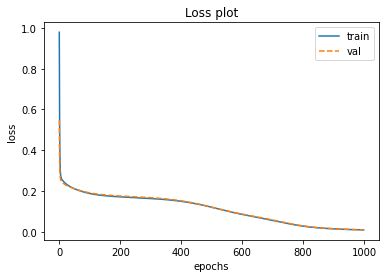

In [15]:
plot_loss(history)

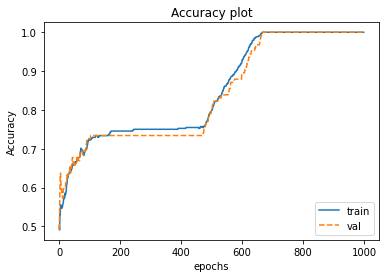

In [16]:
plot_accuracy(history)

In [17]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0085817|	1.00|
Test	|0.0089098|	1.00|


Now it is performing much better, but we have a bit of overfitting, how we can see (but let's try to add a neuron and some epoch)

## Model 3

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [18]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [19]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.6985 - accuracy: 0.4931 - val_loss: 0.5664 - val_accuracy: 0.4194
Epoch 2/1200
1/1 - 0s - loss: 0.5156 - accuracy: 0.4977 - val_loss: 0.4687 - val_accuracy: 0.4435
Epoch 3/1200
1/1 - 0s - loss: 0.4162 - accuracy: 0.5093 - val_loss: 0.4138 - val_accuracy: 0.4677
Epoch 4/1200
1/1 - 0s - loss: 0.3626 - accuracy: 0.5046 - val_loss: 0.3810 - val_accuracy: 0.4919
Epoch 5/1200
1/1 - 0s - loss: 0.3323 - accuracy: 0.5208 - val_loss: 0.3600 - val_accuracy: 0.5403
Epoch 6/1200
1/1 - 0s - loss: 0.3138 - accuracy: 0.5579 - val_loss: 0.3456 - val_accuracy: 0.5403
Epoch 7/1200
1/1 - 0s - loss: 0.3019 - accuracy: 0.5556 - val_loss: 0.3351 - val_accuracy: 0.5161
Epoch 8/1200
1/1 - 0s - loss: 0.2936 - accuracy: 0.5440 - val_loss: 0.3270 - val_accuracy: 0.4839
Epoch 9/1200
1/1 - 0s - loss: 0.2875 - accuracy: 0.5370 - val_loss: 0.3206 - val_accuracy: 0.4919
Epoch 10/1200
1/1 - 0s - loss: 0.2827 - accuracy: 0.5370 - val_loss: 0.3152 - val_accuracy: 0.4919
Epoch 11/1200
1/1 -

Epoch 84/1200
1/1 - 0s - loss: 0.2225 - accuracy: 0.6574 - val_loss: 0.2424 - val_accuracy: 0.5645
Epoch 85/1200
1/1 - 0s - loss: 0.2223 - accuracy: 0.6597 - val_loss: 0.2421 - val_accuracy: 0.5565
Epoch 86/1200
1/1 - 0s - loss: 0.2220 - accuracy: 0.6574 - val_loss: 0.2418 - val_accuracy: 0.5484
Epoch 87/1200
1/1 - 0s - loss: 0.2217 - accuracy: 0.6551 - val_loss: 0.2415 - val_accuracy: 0.5565
Epoch 88/1200
1/1 - 0s - loss: 0.2214 - accuracy: 0.6574 - val_loss: 0.2412 - val_accuracy: 0.5565
Epoch 89/1200
1/1 - 0s - loss: 0.2211 - accuracy: 0.6551 - val_loss: 0.2409 - val_accuracy: 0.5565
Epoch 90/1200
1/1 - 0s - loss: 0.2208 - accuracy: 0.6551 - val_loss: 0.2406 - val_accuracy: 0.5645
Epoch 91/1200
1/1 - 0s - loss: 0.2206 - accuracy: 0.6574 - val_loss: 0.2403 - val_accuracy: 0.5645
Epoch 92/1200
1/1 - 0s - loss: 0.2203 - accuracy: 0.6574 - val_loss: 0.2400 - val_accuracy: 0.5726
Epoch 93/1200
1/1 - 0s - loss: 0.2200 - accuracy: 0.6597 - val_loss: 0.2397 - val_accuracy: 0.5726
Epoch 94/1

1/1 - 0s - loss: 0.1975 - accuracy: 0.6806 - val_loss: 0.2137 - val_accuracy: 0.6210
Epoch 167/1200
1/1 - 0s - loss: 0.1972 - accuracy: 0.6782 - val_loss: 0.2133 - val_accuracy: 0.6210
Epoch 168/1200
1/1 - 0s - loss: 0.1968 - accuracy: 0.6759 - val_loss: 0.2129 - val_accuracy: 0.6290
Epoch 169/1200
1/1 - 0s - loss: 0.1965 - accuracy: 0.6782 - val_loss: 0.2125 - val_accuracy: 0.6290
Epoch 170/1200
1/1 - 0s - loss: 0.1962 - accuracy: 0.6782 - val_loss: 0.2121 - val_accuracy: 0.6290
Epoch 171/1200
1/1 - 0s - loss: 0.1958 - accuracy: 0.6782 - val_loss: 0.2117 - val_accuracy: 0.6290
Epoch 172/1200
1/1 - 0s - loss: 0.1955 - accuracy: 0.6806 - val_loss: 0.2112 - val_accuracy: 0.6371
Epoch 173/1200
1/1 - 0s - loss: 0.1952 - accuracy: 0.6852 - val_loss: 0.2108 - val_accuracy: 0.6371
Epoch 174/1200
1/1 - 0s - loss: 0.1948 - accuracy: 0.6875 - val_loss: 0.2104 - val_accuracy: 0.6371
Epoch 175/1200
1/1 - 0s - loss: 0.1945 - accuracy: 0.6875 - val_loss: 0.2100 - val_accuracy: 0.6371
Epoch 176/1200


Epoch 249/1200
1/1 - 0s - loss: 0.1718 - accuracy: 0.7292 - val_loss: 0.1796 - val_accuracy: 0.7258
Epoch 250/1200
1/1 - 0s - loss: 0.1715 - accuracy: 0.7292 - val_loss: 0.1793 - val_accuracy: 0.7258
Epoch 251/1200
1/1 - 0s - loss: 0.1713 - accuracy: 0.7292 - val_loss: 0.1789 - val_accuracy: 0.7258
Epoch 252/1200
1/1 - 0s - loss: 0.1710 - accuracy: 0.7292 - val_loss: 0.1786 - val_accuracy: 0.7258
Epoch 253/1200
1/1 - 0s - loss: 0.1707 - accuracy: 0.7292 - val_loss: 0.1782 - val_accuracy: 0.7258
Epoch 254/1200
1/1 - 0s - loss: 0.1705 - accuracy: 0.7315 - val_loss: 0.1779 - val_accuracy: 0.7258
Epoch 255/1200
1/1 - 0s - loss: 0.1702 - accuracy: 0.7315 - val_loss: 0.1775 - val_accuracy: 0.7258
Epoch 256/1200
1/1 - 0s - loss: 0.1700 - accuracy: 0.7315 - val_loss: 0.1772 - val_accuracy: 0.7258
Epoch 257/1200
1/1 - 0s - loss: 0.1697 - accuracy: 0.7315 - val_loss: 0.1768 - val_accuracy: 0.7258
Epoch 258/1200
1/1 - 0s - loss: 0.1695 - accuracy: 0.7338 - val_loss: 0.1765 - val_accuracy: 0.7258


Epoch 331/1200
1/1 - 0s - loss: 0.1538 - accuracy: 0.7500 - val_loss: 0.1566 - val_accuracy: 0.7339
Epoch 332/1200
1/1 - 0s - loss: 0.1536 - accuracy: 0.7500 - val_loss: 0.1564 - val_accuracy: 0.7339
Epoch 333/1200
1/1 - 0s - loss: 0.1534 - accuracy: 0.7500 - val_loss: 0.1562 - val_accuracy: 0.7339
Epoch 334/1200
1/1 - 0s - loss: 0.1531 - accuracy: 0.7500 - val_loss: 0.1559 - val_accuracy: 0.7339
Epoch 335/1200
1/1 - 0s - loss: 0.1529 - accuracy: 0.7500 - val_loss: 0.1557 - val_accuracy: 0.7339
Epoch 336/1200
1/1 - 0s - loss: 0.1527 - accuracy: 0.7500 - val_loss: 0.1555 - val_accuracy: 0.7339
Epoch 337/1200
1/1 - 0s - loss: 0.1525 - accuracy: 0.7500 - val_loss: 0.1552 - val_accuracy: 0.7339
Epoch 338/1200
1/1 - 0s - loss: 0.1523 - accuracy: 0.7500 - val_loss: 0.1550 - val_accuracy: 0.7339
Epoch 339/1200
1/1 - 0s - loss: 0.1521 - accuracy: 0.7500 - val_loss: 0.1548 - val_accuracy: 0.7339
Epoch 340/1200
1/1 - 0s - loss: 0.1519 - accuracy: 0.7500 - val_loss: 0.1546 - val_accuracy: 0.7339


Epoch 413/1200
1/1 - 0s - loss: 0.1350 - accuracy: 0.7639 - val_loss: 0.1381 - val_accuracy: 0.7581
Epoch 414/1200
1/1 - 0s - loss: 0.1348 - accuracy: 0.7639 - val_loss: 0.1379 - val_accuracy: 0.7581
Epoch 415/1200
1/1 - 0s - loss: 0.1345 - accuracy: 0.7639 - val_loss: 0.1377 - val_accuracy: 0.7581
Epoch 416/1200
1/1 - 0s - loss: 0.1343 - accuracy: 0.7639 - val_loss: 0.1374 - val_accuracy: 0.7581
Epoch 417/1200
1/1 - 0s - loss: 0.1340 - accuracy: 0.7639 - val_loss: 0.1372 - val_accuracy: 0.7581
Epoch 418/1200
1/1 - 0s - loss: 0.1337 - accuracy: 0.7639 - val_loss: 0.1370 - val_accuracy: 0.7581
Epoch 419/1200
1/1 - 0s - loss: 0.1335 - accuracy: 0.7639 - val_loss: 0.1367 - val_accuracy: 0.7581
Epoch 420/1200
1/1 - 0s - loss: 0.1332 - accuracy: 0.7639 - val_loss: 0.1365 - val_accuracy: 0.7581
Epoch 421/1200
1/1 - 0s - loss: 0.1330 - accuracy: 0.7639 - val_loss: 0.1363 - val_accuracy: 0.7581
Epoch 422/1200
1/1 - 0s - loss: 0.1327 - accuracy: 0.7639 - val_loss: 0.1360 - val_accuracy: 0.7581


Epoch 495/1200
1/1 - 0s - loss: 0.1133 - accuracy: 0.8356 - val_loss: 0.1190 - val_accuracy: 0.8306
Epoch 496/1200
1/1 - 0s - loss: 0.1130 - accuracy: 0.8403 - val_loss: 0.1188 - val_accuracy: 0.8387
Epoch 497/1200
1/1 - 0s - loss: 0.1128 - accuracy: 0.8426 - val_loss: 0.1186 - val_accuracy: 0.8387
Epoch 498/1200
1/1 - 0s - loss: 0.1125 - accuracy: 0.8426 - val_loss: 0.1183 - val_accuracy: 0.8468
Epoch 499/1200
1/1 - 0s - loss: 0.1122 - accuracy: 0.8472 - val_loss: 0.1181 - val_accuracy: 0.8468
Epoch 500/1200
1/1 - 0s - loss: 0.1120 - accuracy: 0.8495 - val_loss: 0.1179 - val_accuracy: 0.8468
Epoch 501/1200
1/1 - 0s - loss: 0.1117 - accuracy: 0.8495 - val_loss: 0.1177 - val_accuracy: 0.8468
Epoch 502/1200
1/1 - 0s - loss: 0.1115 - accuracy: 0.8519 - val_loss: 0.1174 - val_accuracy: 0.8468
Epoch 503/1200
1/1 - 0s - loss: 0.1112 - accuracy: 0.8542 - val_loss: 0.1172 - val_accuracy: 0.8468
Epoch 504/1200
1/1 - 0s - loss: 0.1109 - accuracy: 0.8542 - val_loss: 0.1170 - val_accuracy: 0.8468


Epoch 577/1200
1/1 - 0s - loss: 0.0937 - accuracy: 0.9144 - val_loss: 0.1008 - val_accuracy: 0.9032
Epoch 578/1200
1/1 - 0s - loss: 0.0935 - accuracy: 0.9144 - val_loss: 0.1006 - val_accuracy: 0.9032
Epoch 579/1200
1/1 - 0s - loss: 0.0933 - accuracy: 0.9144 - val_loss: 0.1004 - val_accuracy: 0.9032
Epoch 580/1200
1/1 - 0s - loss: 0.0931 - accuracy: 0.9144 - val_loss: 0.1002 - val_accuracy: 0.9032
Epoch 581/1200
1/1 - 0s - loss: 0.0929 - accuracy: 0.9144 - val_loss: 0.1000 - val_accuracy: 0.9032
Epoch 582/1200
1/1 - 0s - loss: 0.0927 - accuracy: 0.9144 - val_loss: 0.0998 - val_accuracy: 0.9032
Epoch 583/1200
1/1 - 0s - loss: 0.0925 - accuracy: 0.9167 - val_loss: 0.0996 - val_accuracy: 0.9032
Epoch 584/1200
1/1 - 0s - loss: 0.0923 - accuracy: 0.9167 - val_loss: 0.0994 - val_accuracy: 0.9032
Epoch 585/1200
1/1 - 0s - loss: 0.0920 - accuracy: 0.9167 - val_loss: 0.0992 - val_accuracy: 0.9032
Epoch 586/1200
1/1 - 0s - loss: 0.0918 - accuracy: 0.9167 - val_loss: 0.0990 - val_accuracy: 0.9032


Epoch 659/1200
1/1 - 0s - loss: 0.0782 - accuracy: 0.9259 - val_loss: 0.0842 - val_accuracy: 0.9194
Epoch 660/1200
1/1 - 0s - loss: 0.0781 - accuracy: 0.9259 - val_loss: 0.0840 - val_accuracy: 0.9194
Epoch 661/1200
1/1 - 0s - loss: 0.0779 - accuracy: 0.9259 - val_loss: 0.0838 - val_accuracy: 0.9194
Epoch 662/1200
1/1 - 0s - loss: 0.0777 - accuracy: 0.9282 - val_loss: 0.0836 - val_accuracy: 0.9194
Epoch 663/1200
1/1 - 0s - loss: 0.0776 - accuracy: 0.9282 - val_loss: 0.0834 - val_accuracy: 0.9194
Epoch 664/1200
1/1 - 0s - loss: 0.0774 - accuracy: 0.9282 - val_loss: 0.0832 - val_accuracy: 0.9194
Epoch 665/1200
1/1 - 0s - loss: 0.0772 - accuracy: 0.9282 - val_loss: 0.0830 - val_accuracy: 0.9194
Epoch 666/1200
1/1 - 0s - loss: 0.0771 - accuracy: 0.9282 - val_loss: 0.0828 - val_accuracy: 0.9194
Epoch 667/1200
1/1 - 0s - loss: 0.0769 - accuracy: 0.9306 - val_loss: 0.0826 - val_accuracy: 0.9194
Epoch 668/1200
1/1 - 0s - loss: 0.0767 - accuracy: 0.9306 - val_loss: 0.0824 - val_accuracy: 0.9194


Epoch 741/1200
1/1 - 0s - loss: 0.0654 - accuracy: 0.9653 - val_loss: 0.0688 - val_accuracy: 0.9516
Epoch 742/1200
1/1 - 0s - loss: 0.0652 - accuracy: 0.9653 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 743/1200
1/1 - 0s - loss: 0.0651 - accuracy: 0.9653 - val_loss: 0.0684 - val_accuracy: 0.9516
Epoch 744/1200
1/1 - 0s - loss: 0.0649 - accuracy: 0.9653 - val_loss: 0.0683 - val_accuracy: 0.9516
Epoch 745/1200
1/1 - 0s - loss: 0.0648 - accuracy: 0.9653 - val_loss: 0.0681 - val_accuracy: 0.9516
Epoch 746/1200
1/1 - 0s - loss: 0.0647 - accuracy: 0.9653 - val_loss: 0.0679 - val_accuracy: 0.9516
Epoch 747/1200
1/1 - 0s - loss: 0.0645 - accuracy: 0.9653 - val_loss: 0.0677 - val_accuracy: 0.9516
Epoch 748/1200
1/1 - 0s - loss: 0.0644 - accuracy: 0.9653 - val_loss: 0.0675 - val_accuracy: 0.9516
Epoch 749/1200
1/1 - 0s - loss: 0.0642 - accuracy: 0.9653 - val_loss: 0.0674 - val_accuracy: 0.9516
Epoch 750/1200
1/1 - 0s - loss: 0.0641 - accuracy: 0.9653 - val_loss: 0.0672 - val_accuracy: 0.9516


Epoch 823/1200
1/1 - 0s - loss: 0.0537 - accuracy: 0.9722 - val_loss: 0.0547 - val_accuracy: 0.9677
Epoch 824/1200
1/1 - 0s - loss: 0.0536 - accuracy: 0.9722 - val_loss: 0.0545 - val_accuracy: 0.9677
Epoch 825/1200
1/1 - 0s - loss: 0.0534 - accuracy: 0.9722 - val_loss: 0.0544 - val_accuracy: 0.9677
Epoch 826/1200
1/1 - 0s - loss: 0.0533 - accuracy: 0.9722 - val_loss: 0.0542 - val_accuracy: 0.9677
Epoch 827/1200
1/1 - 0s - loss: 0.0531 - accuracy: 0.9722 - val_loss: 0.0540 - val_accuracy: 0.9677
Epoch 828/1200
1/1 - 0s - loss: 0.0530 - accuracy: 0.9722 - val_loss: 0.0539 - val_accuracy: 0.9677
Epoch 829/1200
1/1 - 0s - loss: 0.0529 - accuracy: 0.9722 - val_loss: 0.0537 - val_accuracy: 0.9677
Epoch 830/1200
1/1 - 0s - loss: 0.0527 - accuracy: 0.9722 - val_loss: 0.0535 - val_accuracy: 0.9677
Epoch 831/1200
1/1 - 0s - loss: 0.0526 - accuracy: 0.9722 - val_loss: 0.0534 - val_accuracy: 0.9677
Epoch 832/1200
1/1 - 0s - loss: 0.0524 - accuracy: 0.9722 - val_loss: 0.0532 - val_accuracy: 0.9677


Epoch 905/1200
1/1 - 0s - loss: 0.0418 - accuracy: 0.9722 - val_loss: 0.0413 - val_accuracy: 0.9677
Epoch 906/1200
1/1 - 0s - loss: 0.0417 - accuracy: 0.9722 - val_loss: 0.0412 - val_accuracy: 0.9677
Epoch 907/1200
1/1 - 0s - loss: 0.0415 - accuracy: 0.9722 - val_loss: 0.0410 - val_accuracy: 0.9677
Epoch 908/1200
1/1 - 0s - loss: 0.0414 - accuracy: 0.9722 - val_loss: 0.0409 - val_accuracy: 0.9677
Epoch 909/1200
1/1 - 0s - loss: 0.0412 - accuracy: 0.9722 - val_loss: 0.0407 - val_accuracy: 0.9677
Epoch 910/1200
1/1 - 0s - loss: 0.0411 - accuracy: 0.9722 - val_loss: 0.0405 - val_accuracy: 0.9677
Epoch 911/1200
1/1 - 0s - loss: 0.0409 - accuracy: 0.9722 - val_loss: 0.0404 - val_accuracy: 0.9677
Epoch 912/1200
1/1 - 0s - loss: 0.0407 - accuracy: 0.9722 - val_loss: 0.0402 - val_accuracy: 0.9677
Epoch 913/1200
1/1 - 0s - loss: 0.0406 - accuracy: 0.9722 - val_loss: 0.0400 - val_accuracy: 0.9677
Epoch 914/1200
1/1 - 0s - loss: 0.0404 - accuracy: 0.9722 - val_loss: 0.0399 - val_accuracy: 0.9677


Epoch 987/1200
1/1 - 0s - loss: 0.0287 - accuracy: 0.9954 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 988/1200
1/1 - 0s - loss: 0.0285 - accuracy: 0.9954 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 989/1200
1/1 - 0s - loss: 0.0284 - accuracy: 0.9954 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 990/1200
1/1 - 0s - loss: 0.0282 - accuracy: 0.9954 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 991/1200
1/1 - 0s - loss: 0.0280 - accuracy: 0.9954 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 992/1200
1/1 - 0s - loss: 0.0279 - accuracy: 0.9977 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 993/1200
1/1 - 0s - loss: 0.0277 - accuracy: 0.9977 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 994/1200
1/1 - 0s - loss: 0.0276 - accuracy: 0.9977 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 995/1200
1/1 - 0s - loss: 0.0274 - accuracy: 0.9977 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 996/1200
1/1 - 0s - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000


Epoch 1069/1200
1/1 - 0s - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 1070/1200
1/1 - 0s - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 1071/1200
1/1 - 0s - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 1072/1200
1/1 - 0s - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 1073/1200
1/1 - 0s - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 1074/1200
1/1 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 1075/1200
1/1 - 0s - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 1076/1200
1/1 - 0s - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 1077/1200
1/1 - 0s - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 1078/1200
1/1 - 0s - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0162 - val_accurac

1/1 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 1151/1200
1/1 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 1152/1200
1/1 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 1153/1200
1/1 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 1154/1200
1/1 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 1155/1200
1/1 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 1156/1200
1/1 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 1157/1200
1/1 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 1158/1200
1/1 - 0s - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 1159/1200
1/1 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 

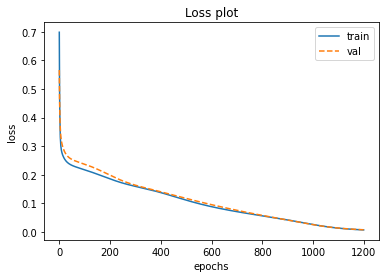

In [20]:
plot_loss(history)

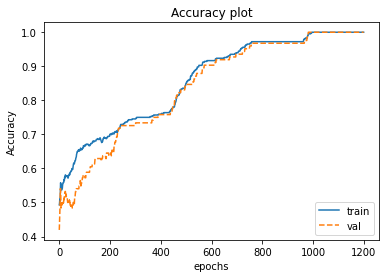

In [21]:
plot_accuracy(history)

In [22]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0076776|	1.00|
Test	|0.0081554|	1.00|


Okkk nice, we are achiving better accuracy at every step, now we are fine but we know that we can do better and achive 100% accuracy on test too, so try with different activation function in the hidden layer

## Model 4

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [23]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=sigmoid))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [24]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 1.0770 - accuracy: 0.5000 - val_loss: 0.6351 - val_accuracy: 0.5000
Epoch 2/1200
1/1 - 0s - loss: 0.6449 - accuracy: 0.5000 - val_loss: 0.3949 - val_accuracy: 0.5000
Epoch 3/1200
1/1 - 0s - loss: 0.4054 - accuracy: 0.5000 - val_loss: 0.3094 - val_accuracy: 0.5000
Epoch 4/1200
1/1 - 0s - loss: 0.3204 - accuracy: 0.5000 - val_loss: 0.2785 - val_accuracy: 0.5161
Epoch 5/1200
1/1 - 0s - loss: 0.2896 - accuracy: 0.4977 - val_loss: 0.2655 - val_accuracy: 0.5000
Epoch 6/1200
1/1 - 0s - loss: 0.2767 - accuracy: 0.4745 - val_loss: 0.2593 - val_accuracy: 0.4597
Epoch 7/1200
1/1 - 0s - loss: 0.2705 - accuracy: 0.4583 - val_loss: 0.2561 - val_accuracy: 0.4919
Epoch 8/1200
1/1 - 0s - loss: 0.2673 - accuracy: 0.4676 - val_loss: 0.2543 - val_accuracy: 0.5000
Epoch 9/1200
1/1 - 0s - loss: 0.2654 - accuracy: 0.4583 - val_loss: 0.2532 - val_accuracy: 0.4839
Epoch 10/1200
1/1 - 0s - loss: 0.2643 - accuracy: 0.4329 - val_loss: 0.2525 - val_accuracy: 0.4919
Epoch 11/1200
1/1 -

Epoch 84/1200
1/1 - 0s - loss: 0.2486 - accuracy: 0.5347 - val_loss: 0.2386 - val_accuracy: 0.6452
Epoch 85/1200
1/1 - 0s - loss: 0.2485 - accuracy: 0.5370 - val_loss: 0.2384 - val_accuracy: 0.6532
Epoch 86/1200
1/1 - 0s - loss: 0.2483 - accuracy: 0.5394 - val_loss: 0.2383 - val_accuracy: 0.6532
Epoch 87/1200
1/1 - 0s - loss: 0.2482 - accuracy: 0.5440 - val_loss: 0.2381 - val_accuracy: 0.6532
Epoch 88/1200
1/1 - 0s - loss: 0.2480 - accuracy: 0.5440 - val_loss: 0.2380 - val_accuracy: 0.6532
Epoch 89/1200
1/1 - 0s - loss: 0.2479 - accuracy: 0.5440 - val_loss: 0.2378 - val_accuracy: 0.6532
Epoch 90/1200
1/1 - 0s - loss: 0.2477 - accuracy: 0.5463 - val_loss: 0.2377 - val_accuracy: 0.6613
Epoch 91/1200
1/1 - 0s - loss: 0.2476 - accuracy: 0.5532 - val_loss: 0.2376 - val_accuracy: 0.6613
Epoch 92/1200
1/1 - 0s - loss: 0.2474 - accuracy: 0.5532 - val_loss: 0.2374 - val_accuracy: 0.6613
Epoch 93/1200
1/1 - 0s - loss: 0.2473 - accuracy: 0.5532 - val_loss: 0.2373 - val_accuracy: 0.6613
Epoch 94/1

1/1 - 0s - loss: 0.2371 - accuracy: 0.6181 - val_loss: 0.2272 - val_accuracy: 0.6774
Epoch 167/1200
1/1 - 0s - loss: 0.2370 - accuracy: 0.6181 - val_loss: 0.2271 - val_accuracy: 0.6855
Epoch 168/1200
1/1 - 0s - loss: 0.2369 - accuracy: 0.6227 - val_loss: 0.2269 - val_accuracy: 0.6855
Epoch 169/1200
1/1 - 0s - loss: 0.2367 - accuracy: 0.6227 - val_loss: 0.2268 - val_accuracy: 0.6855
Epoch 170/1200
1/1 - 0s - loss: 0.2366 - accuracy: 0.6227 - val_loss: 0.2267 - val_accuracy: 0.6935
Epoch 171/1200
1/1 - 0s - loss: 0.2365 - accuracy: 0.6250 - val_loss: 0.2265 - val_accuracy: 0.6935
Epoch 172/1200
1/1 - 0s - loss: 0.2363 - accuracy: 0.6227 - val_loss: 0.2264 - val_accuracy: 0.6935
Epoch 173/1200
1/1 - 0s - loss: 0.2362 - accuracy: 0.6204 - val_loss: 0.2262 - val_accuracy: 0.6935
Epoch 174/1200
1/1 - 0s - loss: 0.2360 - accuracy: 0.6227 - val_loss: 0.2261 - val_accuracy: 0.6935
Epoch 175/1200
1/1 - 0s - loss: 0.2359 - accuracy: 0.6250 - val_loss: 0.2260 - val_accuracy: 0.6935
Epoch 176/1200


1/1 - 0s - loss: 0.2251 - accuracy: 0.6852 - val_loss: 0.2152 - val_accuracy: 0.7419
Epoch 249/1200
1/1 - 0s - loss: 0.2249 - accuracy: 0.6852 - val_loss: 0.2150 - val_accuracy: 0.7419
Epoch 250/1200
1/1 - 0s - loss: 0.2248 - accuracy: 0.6852 - val_loss: 0.2149 - val_accuracy: 0.7419
Epoch 251/1200
1/1 - 0s - loss: 0.2246 - accuracy: 0.6875 - val_loss: 0.2147 - val_accuracy: 0.7419
Epoch 252/1200
1/1 - 0s - loss: 0.2244 - accuracy: 0.6875 - val_loss: 0.2146 - val_accuracy: 0.7419
Epoch 253/1200
1/1 - 0s - loss: 0.2243 - accuracy: 0.6852 - val_loss: 0.2144 - val_accuracy: 0.7419
Epoch 254/1200
1/1 - 0s - loss: 0.2241 - accuracy: 0.6875 - val_loss: 0.2143 - val_accuracy: 0.7419
Epoch 255/1200
1/1 - 0s - loss: 0.2240 - accuracy: 0.6875 - val_loss: 0.2141 - val_accuracy: 0.7419
Epoch 256/1200
1/1 - 0s - loss: 0.2238 - accuracy: 0.6921 - val_loss: 0.2140 - val_accuracy: 0.7339
Epoch 257/1200
1/1 - 0s - loss: 0.2236 - accuracy: 0.6875 - val_loss: 0.2138 - val_accuracy: 0.7339
Epoch 258/1200


1/1 - 0s - loss: 0.2116 - accuracy: 0.7199 - val_loss: 0.2027 - val_accuracy: 0.7177
Epoch 331/1200
1/1 - 0s - loss: 0.2115 - accuracy: 0.7176 - val_loss: 0.2026 - val_accuracy: 0.7177
Epoch 332/1200
1/1 - 0s - loss: 0.2113 - accuracy: 0.7176 - val_loss: 0.2024 - val_accuracy: 0.7177
Epoch 333/1200
1/1 - 0s - loss: 0.2111 - accuracy: 0.7176 - val_loss: 0.2023 - val_accuracy: 0.7177
Epoch 334/1200
1/1 - 0s - loss: 0.2110 - accuracy: 0.7199 - val_loss: 0.2021 - val_accuracy: 0.7177
Epoch 335/1200
1/1 - 0s - loss: 0.2108 - accuracy: 0.7199 - val_loss: 0.2020 - val_accuracy: 0.7177
Epoch 336/1200
1/1 - 0s - loss: 0.2106 - accuracy: 0.7199 - val_loss: 0.2018 - val_accuracy: 0.7177
Epoch 337/1200
1/1 - 0s - loss: 0.2105 - accuracy: 0.7222 - val_loss: 0.2017 - val_accuracy: 0.7177
Epoch 338/1200
1/1 - 0s - loss: 0.2103 - accuracy: 0.7222 - val_loss: 0.2015 - val_accuracy: 0.7177
Epoch 339/1200
1/1 - 0s - loss: 0.2101 - accuracy: 0.7222 - val_loss: 0.2014 - val_accuracy: 0.7177
Epoch 340/1200


1/1 - 0s - loss: 0.1987 - accuracy: 0.7338 - val_loss: 0.1920 - val_accuracy: 0.7419
Epoch 413/1200
1/1 - 0s - loss: 0.1985 - accuracy: 0.7338 - val_loss: 0.1919 - val_accuracy: 0.7419
Epoch 414/1200
1/1 - 0s - loss: 0.1984 - accuracy: 0.7338 - val_loss: 0.1918 - val_accuracy: 0.7419
Epoch 415/1200
1/1 - 0s - loss: 0.1982 - accuracy: 0.7338 - val_loss: 0.1917 - val_accuracy: 0.7419
Epoch 416/1200
1/1 - 0s - loss: 0.1981 - accuracy: 0.7338 - val_loss: 0.1916 - val_accuracy: 0.7419
Epoch 417/1200
1/1 - 0s - loss: 0.1979 - accuracy: 0.7361 - val_loss: 0.1915 - val_accuracy: 0.7419
Epoch 418/1200
1/1 - 0s - loss: 0.1978 - accuracy: 0.7361 - val_loss: 0.1914 - val_accuracy: 0.7419
Epoch 419/1200
1/1 - 0s - loss: 0.1977 - accuracy: 0.7384 - val_loss: 0.1912 - val_accuracy: 0.7419
Epoch 420/1200
1/1 - 0s - loss: 0.1975 - accuracy: 0.7384 - val_loss: 0.1911 - val_accuracy: 0.7419
Epoch 421/1200
1/1 - 0s - loss: 0.1974 - accuracy: 0.7384 - val_loss: 0.1910 - val_accuracy: 0.7419
Epoch 422/1200


1/1 - 0s - loss: 0.1882 - accuracy: 0.7477 - val_loss: 0.1847 - val_accuracy: 0.7419
Epoch 495/1200
1/1 - 0s - loss: 0.1881 - accuracy: 0.7477 - val_loss: 0.1846 - val_accuracy: 0.7339
Epoch 496/1200
1/1 - 0s - loss: 0.1880 - accuracy: 0.7454 - val_loss: 0.1846 - val_accuracy: 0.7339
Epoch 497/1200
1/1 - 0s - loss: 0.1879 - accuracy: 0.7454 - val_loss: 0.1845 - val_accuracy: 0.7339
Epoch 498/1200
1/1 - 0s - loss: 0.1878 - accuracy: 0.7454 - val_loss: 0.1844 - val_accuracy: 0.7339
Epoch 499/1200
1/1 - 0s - loss: 0.1877 - accuracy: 0.7454 - val_loss: 0.1844 - val_accuracy: 0.7339
Epoch 500/1200
1/1 - 0s - loss: 0.1876 - accuracy: 0.7431 - val_loss: 0.1843 - val_accuracy: 0.7339
Epoch 501/1200
1/1 - 0s - loss: 0.1875 - accuracy: 0.7407 - val_loss: 0.1843 - val_accuracy: 0.7339
Epoch 502/1200
1/1 - 0s - loss: 0.1874 - accuracy: 0.7407 - val_loss: 0.1842 - val_accuracy: 0.7339
Epoch 503/1200
1/1 - 0s - loss: 0.1873 - accuracy: 0.7407 - val_loss: 0.1841 - val_accuracy: 0.7339
Epoch 504/1200


1/1 - 0s - loss: 0.1809 - accuracy: 0.7500 - val_loss: 0.1806 - val_accuracy: 0.7339
Epoch 577/1200
1/1 - 0s - loss: 0.1808 - accuracy: 0.7500 - val_loss: 0.1806 - val_accuracy: 0.7339
Epoch 578/1200
1/1 - 0s - loss: 0.1808 - accuracy: 0.7500 - val_loss: 0.1805 - val_accuracy: 0.7339
Epoch 579/1200
1/1 - 0s - loss: 0.1807 - accuracy: 0.7500 - val_loss: 0.1805 - val_accuracy: 0.7339
Epoch 580/1200
1/1 - 0s - loss: 0.1806 - accuracy: 0.7500 - val_loss: 0.1804 - val_accuracy: 0.7339
Epoch 581/1200
1/1 - 0s - loss: 0.1806 - accuracy: 0.7500 - val_loss: 0.1804 - val_accuracy: 0.7339
Epoch 582/1200
1/1 - 0s - loss: 0.1805 - accuracy: 0.7500 - val_loss: 0.1804 - val_accuracy: 0.7339
Epoch 583/1200
1/1 - 0s - loss: 0.1804 - accuracy: 0.7500 - val_loss: 0.1803 - val_accuracy: 0.7339
Epoch 584/1200
1/1 - 0s - loss: 0.1804 - accuracy: 0.7500 - val_loss: 0.1803 - val_accuracy: 0.7339
Epoch 585/1200
1/1 - 0s - loss: 0.1803 - accuracy: 0.7500 - val_loss: 0.1803 - val_accuracy: 0.7339
Epoch 586/1200


1/1 - 0s - loss: 0.1763 - accuracy: 0.7500 - val_loss: 0.1785 - val_accuracy: 0.7339
Epoch 659/1200
1/1 - 0s - loss: 0.1762 - accuracy: 0.7500 - val_loss: 0.1785 - val_accuracy: 0.7339
Epoch 660/1200
1/1 - 0s - loss: 0.1762 - accuracy: 0.7500 - val_loss: 0.1784 - val_accuracy: 0.7339
Epoch 661/1200
1/1 - 0s - loss: 0.1761 - accuracy: 0.7500 - val_loss: 0.1784 - val_accuracy: 0.7339
Epoch 662/1200
1/1 - 0s - loss: 0.1761 - accuracy: 0.7500 - val_loss: 0.1784 - val_accuracy: 0.7339
Epoch 663/1200
1/1 - 0s - loss: 0.1760 - accuracy: 0.7500 - val_loss: 0.1784 - val_accuracy: 0.7339
Epoch 664/1200
1/1 - 0s - loss: 0.1760 - accuracy: 0.7500 - val_loss: 0.1784 - val_accuracy: 0.7339
Epoch 665/1200
1/1 - 0s - loss: 0.1760 - accuracy: 0.7500 - val_loss: 0.1783 - val_accuracy: 0.7339
Epoch 666/1200
1/1 - 0s - loss: 0.1759 - accuracy: 0.7500 - val_loss: 0.1783 - val_accuracy: 0.7339
Epoch 667/1200
1/1 - 0s - loss: 0.1759 - accuracy: 0.7500 - val_loss: 0.1783 - val_accuracy: 0.7339
Epoch 668/1200


1/1 - 0s - loss: 0.1734 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 741/1200
1/1 - 0s - loss: 0.1733 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 742/1200
1/1 - 0s - loss: 0.1733 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 743/1200
1/1 - 0s - loss: 0.1733 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 744/1200
1/1 - 0s - loss: 0.1732 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 745/1200
1/1 - 0s - loss: 0.1732 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 746/1200
1/1 - 0s - loss: 0.1732 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 747/1200
1/1 - 0s - loss: 0.1732 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 748/1200
1/1 - 0s - loss: 0.1731 - accuracy: 0.7500 - val_loss: 0.1773 - val_accuracy: 0.7339
Epoch 749/1200
1/1 - 0s - loss: 0.1731 - accuracy: 0.7500 - val_loss: 0.1772 - val_accuracy: 0.7339
Epoch 750/1200


1/1 - 0s - loss: 0.1715 - accuracy: 0.7500 - val_loss: 0.1766 - val_accuracy: 0.7339
Epoch 823/1200
1/1 - 0s - loss: 0.1715 - accuracy: 0.7500 - val_loss: 0.1766 - val_accuracy: 0.7339
Epoch 824/1200
1/1 - 0s - loss: 0.1714 - accuracy: 0.7500 - val_loss: 0.1766 - val_accuracy: 0.7339
Epoch 825/1200
1/1 - 0s - loss: 0.1714 - accuracy: 0.7500 - val_loss: 0.1766 - val_accuracy: 0.7339
Epoch 826/1200
1/1 - 0s - loss: 0.1714 - accuracy: 0.7500 - val_loss: 0.1765 - val_accuracy: 0.7339
Epoch 827/1200
1/1 - 0s - loss: 0.1714 - accuracy: 0.7500 - val_loss: 0.1765 - val_accuracy: 0.7339
Epoch 828/1200
1/1 - 0s - loss: 0.1714 - accuracy: 0.7500 - val_loss: 0.1765 - val_accuracy: 0.7339
Epoch 829/1200
1/1 - 0s - loss: 0.1714 - accuracy: 0.7500 - val_loss: 0.1765 - val_accuracy: 0.7339
Epoch 830/1200
1/1 - 0s - loss: 0.1713 - accuracy: 0.7500 - val_loss: 0.1765 - val_accuracy: 0.7339
Epoch 831/1200
1/1 - 0s - loss: 0.1713 - accuracy: 0.7500 - val_loss: 0.1765 - val_accuracy: 0.7339
Epoch 832/1200


1/1 - 0s - loss: 0.1702 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 905/1200
1/1 - 0s - loss: 0.1702 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 906/1200
1/1 - 0s - loss: 0.1702 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 907/1200
1/1 - 0s - loss: 0.1702 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 908/1200
1/1 - 0s - loss: 0.1701 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 909/1200
1/1 - 0s - loss: 0.1701 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 910/1200
1/1 - 0s - loss: 0.1701 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 911/1200
1/1 - 0s - loss: 0.1701 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 912/1200
1/1 - 0s - loss: 0.1701 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 913/1200
1/1 - 0s - loss: 0.1701 - accuracy: 0.7500 - val_loss: 0.1759 - val_accuracy: 0.7339
Epoch 914/1200


1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 987/1200
1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 988/1200
1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 989/1200
1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 990/1200
1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 991/1200
1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 992/1200
1/1 - 0s - loss: 0.1692 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 993/1200
1/1 - 0s - loss: 0.1691 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 994/1200
1/1 - 0s - loss: 0.1691 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 995/1200
1/1 - 0s - loss: 0.1691 - accuracy: 0.7500 - val_loss: 0.1753 - val_accuracy: 0.7339
Epoch 996/1200


Epoch 1068/1200
1/1 - 0s - loss: 0.1684 - accuracy: 0.7500 - val_loss: 0.1747 - val_accuracy: 0.7339
Epoch 1069/1200
1/1 - 0s - loss: 0.1684 - accuracy: 0.7500 - val_loss: 0.1747 - val_accuracy: 0.7339
Epoch 1070/1200
1/1 - 0s - loss: 0.1684 - accuracy: 0.7500 - val_loss: 0.1747 - val_accuracy: 0.7339
Epoch 1071/1200
1/1 - 0s - loss: 0.1684 - accuracy: 0.7500 - val_loss: 0.1747 - val_accuracy: 0.7339
Epoch 1072/1200
1/1 - 0s - loss: 0.1684 - accuracy: 0.7500 - val_loss: 0.1747 - val_accuracy: 0.7339
Epoch 1073/1200
1/1 - 0s - loss: 0.1683 - accuracy: 0.7500 - val_loss: 0.1746 - val_accuracy: 0.7339
Epoch 1074/1200
1/1 - 0s - loss: 0.1683 - accuracy: 0.7500 - val_loss: 0.1746 - val_accuracy: 0.7339
Epoch 1075/1200
1/1 - 0s - loss: 0.1683 - accuracy: 0.7500 - val_loss: 0.1746 - val_accuracy: 0.7339
Epoch 1076/1200
1/1 - 0s - loss: 0.1683 - accuracy: 0.7500 - val_loss: 0.1746 - val_accuracy: 0.7339
Epoch 1077/1200
1/1 - 0s - loss: 0.1683 - accuracy: 0.7500 - val_loss: 0.1746 - val_accurac

1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1150/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1151/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1152/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1153/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1154/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1155/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1156/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1157/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 1158/1200
1/1 - 0s - loss: 0.1676 - accuracy: 0.7500 - val_loss: 0.1740 - val_accuracy: 0.7339
Epoch 

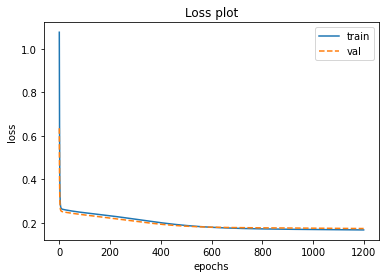

In [25]:
plot_loss(history)

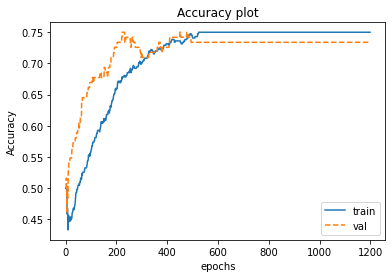

In [26]:
plot_accuracy(history)

In [27]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1671789|	0.75|
Test	|0.1736064|	0.73|


The sigmoid function don't work really well, so don't use it, for the next experiment lets try to add the momentum for the SGD optimizer

## Model 5

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [27]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [28]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.8996 - accuracy: 0.5000 - val_loss: 0.4751 - val_accuracy: 0.4745
Epoch 2/1200
1/1 - 0s - loss: 0.4813 - accuracy: 0.4758 - val_loss: 0.2811 - val_accuracy: 0.4838
Epoch 3/1200
1/1 - 0s - loss: 0.2769 - accuracy: 0.4919 - val_loss: 0.2879 - val_accuracy: 0.5231
Epoch 4/1200
1/1 - 0s - loss: 0.2835 - accuracy: 0.5323 - val_loss: 0.3049 - val_accuracy: 0.5116
Epoch 5/1200
1/1 - 0s - loss: 0.3009 - accuracy: 0.5081 - val_loss: 0.3057 - val_accuracy: 0.5069
Epoch 6/1200
1/1 - 0s - loss: 0.3011 - accuracy: 0.5000 - val_loss: 0.2947 - val_accuracy: 0.5185
Epoch 7/1200
1/1 - 0s - loss: 0.2889 - accuracy: 0.5323 - val_loss: 0.2781 - val_accuracy: 0.5417
Epoch 8/1200
1/1 - 0s - loss: 0.2707 - accuracy: 0.5484 - val_loss: 0.2620 - val_accuracy: 0.5579
Epoch 9/1200
1/1 - 0s - loss: 0.2531 - accuracy: 0.5726 - val_loss: 0.2510 - val_accuracy: 0.5787
Epoch 10/1200
1/1 - 0s - loss: 0.2410 - accuracy: 0.5968 - val_loss: 0.2463 - val_accuracy: 0.5856
Epoch 11/1200
1/1 -

Epoch 84/1200
1/1 - 0s - loss: 0.1392 - accuracy: 0.8548 - val_loss: 0.1789 - val_accuracy: 0.7685
Epoch 85/1200
1/1 - 0s - loss: 0.1387 - accuracy: 0.8548 - val_loss: 0.1784 - val_accuracy: 0.7685
Epoch 86/1200
1/1 - 0s - loss: 0.1383 - accuracy: 0.8548 - val_loss: 0.1779 - val_accuracy: 0.7685
Epoch 87/1200
1/1 - 0s - loss: 0.1379 - accuracy: 0.8548 - val_loss: 0.1775 - val_accuracy: 0.7685
Epoch 88/1200
1/1 - 0s - loss: 0.1374 - accuracy: 0.8548 - val_loss: 0.1770 - val_accuracy: 0.7685
Epoch 89/1200
1/1 - 0s - loss: 0.1370 - accuracy: 0.8548 - val_loss: 0.1765 - val_accuracy: 0.7685
Epoch 90/1200
1/1 - 0s - loss: 0.1366 - accuracy: 0.8548 - val_loss: 0.1761 - val_accuracy: 0.7708
Epoch 91/1200
1/1 - 0s - loss: 0.1362 - accuracy: 0.8548 - val_loss: 0.1756 - val_accuracy: 0.7708
Epoch 92/1200
1/1 - 0s - loss: 0.1357 - accuracy: 0.8548 - val_loss: 0.1752 - val_accuracy: 0.7708
Epoch 93/1200
1/1 - 0s - loss: 0.1353 - accuracy: 0.8548 - val_loss: 0.1747 - val_accuracy: 0.7708
Epoch 94/1

1/1 - 0s - loss: 0.1006 - accuracy: 0.8871 - val_loss: 0.1397 - val_accuracy: 0.8148
Epoch 167/1200
1/1 - 0s - loss: 0.1000 - accuracy: 0.8871 - val_loss: 0.1391 - val_accuracy: 0.8125
Epoch 168/1200
1/1 - 0s - loss: 0.0994 - accuracy: 0.8871 - val_loss: 0.1385 - val_accuracy: 0.8125
Epoch 169/1200
1/1 - 0s - loss: 0.0988 - accuracy: 0.8871 - val_loss: 0.1379 - val_accuracy: 0.8125
Epoch 170/1200
1/1 - 0s - loss: 0.0982 - accuracy: 0.8871 - val_loss: 0.1372 - val_accuracy: 0.8125
Epoch 171/1200
1/1 - 0s - loss: 0.0976 - accuracy: 0.8871 - val_loss: 0.1366 - val_accuracy: 0.8148
Epoch 172/1200
1/1 - 0s - loss: 0.0970 - accuracy: 0.8871 - val_loss: 0.1360 - val_accuracy: 0.8148
Epoch 173/1200
1/1 - 0s - loss: 0.0964 - accuracy: 0.8871 - val_loss: 0.1354 - val_accuracy: 0.8148
Epoch 174/1200
1/1 - 0s - loss: 0.0958 - accuracy: 0.8871 - val_loss: 0.1347 - val_accuracy: 0.8148
Epoch 175/1200
1/1 - 0s - loss: 0.0952 - accuracy: 0.8871 - val_loss: 0.1341 - val_accuracy: 0.8171
Epoch 176/1200


1/1 - 0s - loss: 0.0458 - accuracy: 0.9758 - val_loss: 0.0749 - val_accuracy: 0.9421
Epoch 249/1200
1/1 - 0s - loss: 0.0452 - accuracy: 0.9758 - val_loss: 0.0741 - val_accuracy: 0.9444
Epoch 250/1200
1/1 - 0s - loss: 0.0446 - accuracy: 0.9758 - val_loss: 0.0734 - val_accuracy: 0.9444
Epoch 251/1200
1/1 - 0s - loss: 0.0440 - accuracy: 0.9758 - val_loss: 0.0726 - val_accuracy: 0.9468
Epoch 252/1200
1/1 - 0s - loss: 0.0435 - accuracy: 0.9758 - val_loss: 0.0719 - val_accuracy: 0.9468
Epoch 253/1200
1/1 - 0s - loss: 0.0429 - accuracy: 0.9758 - val_loss: 0.0712 - val_accuracy: 0.9491
Epoch 254/1200
1/1 - 0s - loss: 0.0424 - accuracy: 0.9839 - val_loss: 0.0704 - val_accuracy: 0.9491
Epoch 255/1200
1/1 - 0s - loss: 0.0418 - accuracy: 0.9839 - val_loss: 0.0697 - val_accuracy: 0.9491
Epoch 256/1200
1/1 - 0s - loss: 0.0413 - accuracy: 0.9839 - val_loss: 0.0690 - val_accuracy: 0.9491
Epoch 257/1200
1/1 - 0s - loss: 0.0408 - accuracy: 0.9839 - val_loss: 0.0683 - val_accuracy: 0.9491
Epoch 258/1200


1/1 - 0s - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9838
Epoch 331/1200
1/1 - 0s - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9838
Epoch 332/1200
1/1 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9838
Epoch 333/1200
1/1 - 0s - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 0.9838
Epoch 334/1200
1/1 - 0s - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0334 - val_accuracy: 0.9838
Epoch 335/1200
1/1 - 0s - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9861
Epoch 336/1200
1/1 - 0s - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9861
Epoch 337/1200
1/1 - 0s - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9861
Epoch 338/1200
1/1 - 0s - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9861
Epoch 339/1200
1/1 - 0s - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9861
Epoch 340/1200


1/1 - 0s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0184 - val_accuracy: 0.9954
Epoch 413/1200
1/1 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9954
Epoch 414/1200
1/1 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9954
Epoch 415/1200
1/1 - 0s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9954
Epoch 416/1200
1/1 - 0s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9954
Epoch 417/1200
1/1 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 418/1200
1/1 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9954
Epoch 419/1200
1/1 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9954
Epoch 420/1200
1/1 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9954
Epoch 421/1200
1/1 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9954
Epoch 422/1200


1/1 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 495/1200
1/1 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 496/1200
1/1 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 497/1200
1/1 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 498/1200
1/1 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 499/1200
1/1 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 500/1200
1/1 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 501/1200
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 502/1200
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 503/1200
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 504/1200


Epoch 577/1200
1/1 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 578/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 579/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 580/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 581/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 582/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 583/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 584/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 585/1200
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 586/1200
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000


Epoch 659/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 660/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 661/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 662/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 663/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 664/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 665/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 666/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 667/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 668/1200
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000


Epoch 741/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 742/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 743/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 744/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 745/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 746/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 747/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 748/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 749/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 750/1200
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000


Epoch 823/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 824/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 825/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 826/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 827/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 828/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 829/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 830/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 831/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 832/1200
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000


Epoch 905/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 906/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 907/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 908/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 909/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 910/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 911/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 912/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 913/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 914/1200
1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000


Epoch 986/1200
1/1 - 0s - loss: 9.4762e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 987/1200
1/1 - 0s - loss: 9.4592e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 988/1200
1/1 - 0s - loss: 9.4423e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 989/1200
1/1 - 0s - loss: 9.4254e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 990/1200
1/1 - 0s - loss: 9.4086e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 991/1200
1/1 - 0s - loss: 9.3918e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 992/1200
1/1 - 0s - loss: 9.3751e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 993/1200
1/1 - 0s - loss: 9.3584e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 994/1200
1/1 - 0s - loss: 9.3418e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 995/1200
1/1 - 0s - loss: 9.3252e-04 - accuracy: 1.0000 - 

Epoch 1065/1200
1/1 - 0s - loss: 8.2878e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1066/1200
1/1 - 0s - loss: 8.2746e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1067/1200
1/1 - 0s - loss: 8.2613e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1068/1200
1/1 - 0s - loss: 8.2482e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1069/1200
1/1 - 0s - loss: 8.2350e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1070/1200
1/1 - 0s - loss: 8.2219e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1071/1200
1/1 - 0s - loss: 8.2088e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1072/1200
1/1 - 0s - loss: 8.1958e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1073/1200
1/1 - 0s - loss: 8.1828e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1074/1200
1/1 - 0s - loss: 8.1699e-04 - accuracy:

1/1 - 0s - loss: 7.3599e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1144/1200
1/1 - 0s - loss: 7.3492e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1145/1200
1/1 - 0s - loss: 7.3386e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1146/1200
1/1 - 0s - loss: 7.3280e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1147/1200
1/1 - 0s - loss: 7.3175e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1148/1200
1/1 - 0s - loss: 7.3070e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1149/1200
1/1 - 0s - loss: 7.2965e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1150/1200
1/1 - 0s - loss: 7.2860e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1151/1200
1/1 - 0s - loss: 7.2756e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1152/1200
1/1 - 0s - loss: 7.2652e-04 - accuracy: 1.0000 - val_lo

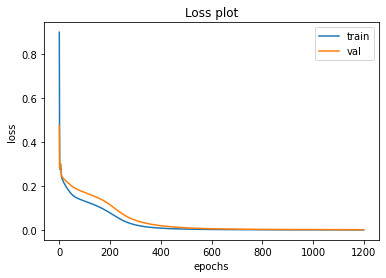

In [29]:
plot_loss(history)

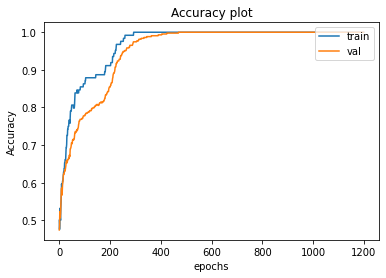

In [30]:
plot_accuracy(history)

In [31]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0006796|	1.00|
Test	|0.0017077|	1.00|


As we can see with the addition of momentum the network converge to 100% accuracy much faster, so try to use less epochs like 600.

## Model 6

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [32]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=600

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [33]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
1/1 - 0s - loss: 0.8721 - accuracy: 0.5161 - val_loss: 0.5290 - val_accuracy: 0.5394
Epoch 2/600
1/1 - 0s - loss: 0.5501 - accuracy: 0.5484 - val_loss: 0.2887 - val_accuracy: 0.5926
Epoch 3/600
1/1 - 0s - loss: 0.2905 - accuracy: 0.5645 - val_loss: 0.2402 - val_accuracy: 0.6065
Epoch 4/600
1/1 - 0s - loss: 0.2324 - accuracy: 0.5968 - val_loss: 0.2508 - val_accuracy: 0.5741
Epoch 5/600
1/1 - 0s - loss: 0.2414 - accuracy: 0.5645 - val_loss: 0.2582 - val_accuracy: 0.5648
Epoch 6/600
1/1 - 0s - loss: 0.2485 - accuracy: 0.5806 - val_loss: 0.2549 - val_accuracy: 0.5671
Epoch 7/600
1/1 - 0s - loss: 0.2441 - accuracy: 0.5806 - val_loss: 0.2446 - val_accuracy: 0.5694
Epoch 8/600
1/1 - 0s - loss: 0.2322 - accuracy: 0.5726 - val_loss: 0.2323 - val_accuracy: 0.5972
Epoch 9/600
1/1 - 0s - loss: 0.2178 - accuracy: 0.6290 - val_loss: 0.2224 - val_accuracy: 0.6042
Epoch 10/600
1/1 - 0s - loss: 0.2056 - accuracy: 0.6129 - val_loss: 0.2170 - val_accuracy: 0.6042
Epoch 11/600
1/1 - 0s - loss:

Epoch 85/600
1/1 - 0s - loss: 0.1329 - accuracy: 0.8387 - val_loss: 0.1768 - val_accuracy: 0.7384
Epoch 86/600
1/1 - 0s - loss: 0.1325 - accuracy: 0.8387 - val_loss: 0.1764 - val_accuracy: 0.7384
Epoch 87/600
1/1 - 0s - loss: 0.1321 - accuracy: 0.8387 - val_loss: 0.1759 - val_accuracy: 0.7407
Epoch 88/600
1/1 - 0s - loss: 0.1316 - accuracy: 0.8387 - val_loss: 0.1755 - val_accuracy: 0.7384
Epoch 89/600
1/1 - 0s - loss: 0.1312 - accuracy: 0.8387 - val_loss: 0.1751 - val_accuracy: 0.7384
Epoch 90/600
1/1 - 0s - loss: 0.1308 - accuracy: 0.8387 - val_loss: 0.1747 - val_accuracy: 0.7407
Epoch 91/600
1/1 - 0s - loss: 0.1303 - accuracy: 0.8468 - val_loss: 0.1743 - val_accuracy: 0.7407
Epoch 92/600
1/1 - 0s - loss: 0.1299 - accuracy: 0.8468 - val_loss: 0.1739 - val_accuracy: 0.7431
Epoch 93/600
1/1 - 0s - loss: 0.1295 - accuracy: 0.8468 - val_loss: 0.1735 - val_accuracy: 0.7431
Epoch 94/600
1/1 - 0s - loss: 0.1290 - accuracy: 0.8468 - val_loss: 0.1730 - val_accuracy: 0.7454
Epoch 95/600
1/1 - 0

Epoch 168/600
1/1 - 0s - loss: 0.0910 - accuracy: 0.9113 - val_loss: 0.1353 - val_accuracy: 0.8148
Epoch 169/600
1/1 - 0s - loss: 0.0904 - accuracy: 0.9113 - val_loss: 0.1346 - val_accuracy: 0.8171
Epoch 170/600
1/1 - 0s - loss: 0.0898 - accuracy: 0.9113 - val_loss: 0.1340 - val_accuracy: 0.8171
Epoch 171/600
1/1 - 0s - loss: 0.0891 - accuracy: 0.9113 - val_loss: 0.1333 - val_accuracy: 0.8171
Epoch 172/600
1/1 - 0s - loss: 0.0885 - accuracy: 0.9113 - val_loss: 0.1326 - val_accuracy: 0.8171
Epoch 173/600
1/1 - 0s - loss: 0.0879 - accuracy: 0.9113 - val_loss: 0.1320 - val_accuracy: 0.8194
Epoch 174/600
1/1 - 0s - loss: 0.0873 - accuracy: 0.9113 - val_loss: 0.1313 - val_accuracy: 0.8171
Epoch 175/600
1/1 - 0s - loss: 0.0866 - accuracy: 0.9113 - val_loss: 0.1306 - val_accuracy: 0.8194
Epoch 176/600
1/1 - 0s - loss: 0.0860 - accuracy: 0.9113 - val_loss: 0.1300 - val_accuracy: 0.8218
Epoch 177/600
1/1 - 0s - loss: 0.0854 - accuracy: 0.9113 - val_loss: 0.1293 - val_accuracy: 0.8241
Epoch 178/

Epoch 251/600
1/1 - 0s - loss: 0.0434 - accuracy: 0.9839 - val_loss: 0.0806 - val_accuracy: 0.9028
Epoch 252/600
1/1 - 0s - loss: 0.0430 - accuracy: 0.9839 - val_loss: 0.0801 - val_accuracy: 0.9028
Epoch 253/600
1/1 - 0s - loss: 0.0426 - accuracy: 0.9839 - val_loss: 0.0796 - val_accuracy: 0.9028
Epoch 254/600
1/1 - 0s - loss: 0.0422 - accuracy: 0.9839 - val_loss: 0.0791 - val_accuracy: 0.9051
Epoch 255/600
1/1 - 0s - loss: 0.0418 - accuracy: 0.9839 - val_loss: 0.0786 - val_accuracy: 0.9074
Epoch 256/600
1/1 - 0s - loss: 0.0414 - accuracy: 0.9839 - val_loss: 0.0781 - val_accuracy: 0.9074
Epoch 257/600
1/1 - 0s - loss: 0.0410 - accuracy: 0.9839 - val_loss: 0.0776 - val_accuracy: 0.9097
Epoch 258/600
1/1 - 0s - loss: 0.0406 - accuracy: 0.9839 - val_loss: 0.0771 - val_accuracy: 0.9097
Epoch 259/600
1/1 - 0s - loss: 0.0403 - accuracy: 0.9839 - val_loss: 0.0766 - val_accuracy: 0.9097
Epoch 260/600
1/1 - 0s - loss: 0.0399 - accuracy: 0.9839 - val_loss: 0.0761 - val_accuracy: 0.9097
Epoch 261/

Epoch 334/600
1/1 - 0s - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9537
Epoch 335/600
1/1 - 0s - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 0.9537
Epoch 336/600
1/1 - 0s - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9537
Epoch 337/600
1/1 - 0s - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9583
Epoch 338/600
1/1 - 0s - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9583
Epoch 339/600
1/1 - 0s - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9606
Epoch 340/600
1/1 - 0s - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9630
Epoch 341/600
1/1 - 0s - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9630
Epoch 342/600
1/1 - 0s - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9630
Epoch 343/600
1/1 - 0s - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9630
Epoch 344/

Epoch 417/600
1/1 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9907
Epoch 418/600
1/1 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9931
Epoch 419/600
1/1 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9954
Epoch 420/600
1/1 - 0s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9954
Epoch 421/600
1/1 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 0.9954
Epoch 422/600
1/1 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 0.9954
Epoch 423/600
1/1 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 0.9954
Epoch 424/600
1/1 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9954
Epoch 425/600
1/1 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9954
Epoch 426/600
1/1 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 0.9954
Epoch 427/

Epoch 500/600
1/1 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 501/600
1/1 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 502/600
1/1 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 503/600
1/1 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 504/600
1/1 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 505/600
1/1 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 506/600
1/1 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 507/600
1/1 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 508/600
1/1 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 509/600
1/1 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 510/

Epoch 583/600
1/1 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 584/600
1/1 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 585/600
1/1 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 586/600
1/1 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 587/600
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 588/600
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 589/600
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 590/600
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 591/600
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 592/600
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 593/

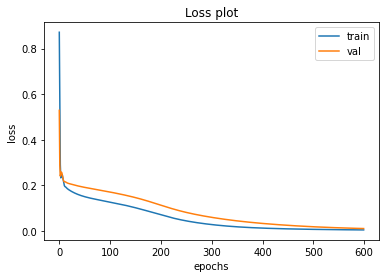

In [34]:
plot_loss(history)

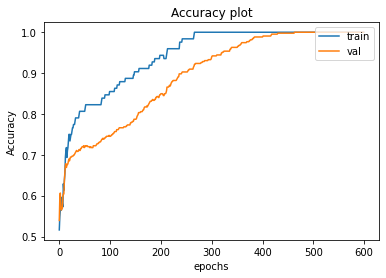

In [35]:
plot_accuracy(history)

In [36]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0038194|	1.00|
Test	|0.0098593|	1.00|


Ok we are fine, but now try to use the nesterov SGD too and see what change

## Model 7

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = True  
    kernel_regularize=None  
    loss = MSE

In [47]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=600

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [48]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
1/1 - 0s - loss: 0.6698 - accuracy: 0.5000 - val_loss: 0.2926 - val_accuracy: 0.5394
Epoch 2/600
1/1 - 0s - loss: 0.2879 - accuracy: 0.5887 - val_loss: 0.2604 - val_accuracy: 0.5556
Epoch 3/600
1/1 - 0s - loss: 0.2505 - accuracy: 0.5242 - val_loss: 0.2624 - val_accuracy: 0.5278
Epoch 4/600
1/1 - 0s - loss: 0.2502 - accuracy: 0.5323 - val_loss: 0.2607 - val_accuracy: 0.5301
Epoch 5/600
1/1 - 0s - loss: 0.2462 - accuracy: 0.5403 - val_loss: 0.2556 - val_accuracy: 0.5440
Epoch 6/600
1/1 - 0s - loss: 0.2387 - accuracy: 0.5484 - val_loss: 0.2504 - val_accuracy: 0.5625
Epoch 7/600
1/1 - 0s - loss: 0.2309 - accuracy: 0.5806 - val_loss: 0.2467 - val_accuracy: 0.5856
Epoch 8/600
1/1 - 0s - loss: 0.2249 - accuracy: 0.5968 - val_loss: 0.2443 - val_accuracy: 0.6111
Epoch 9/600
1/1 - 0s - loss: 0.2203 - accuracy: 0.6210 - val_loss: 0.2424 - val_accuracy: 0.6227
Epoch 10/600
1/1 - 0s - loss: 0.2165 - accuracy: 0.6290 - val_loss: 0.2405 - val_accuracy: 0.6157
Epoch 11/600
1/1 - 0s - loss:

Epoch 85/600
1/1 - 0s - loss: 0.1503 - accuracy: 0.7984 - val_loss: 0.1988 - val_accuracy: 0.7130
Epoch 86/600
1/1 - 0s - loss: 0.1501 - accuracy: 0.7984 - val_loss: 0.1986 - val_accuracy: 0.7130
Epoch 87/600
1/1 - 0s - loss: 0.1500 - accuracy: 0.7984 - val_loss: 0.1984 - val_accuracy: 0.7130
Epoch 88/600
1/1 - 0s - loss: 0.1499 - accuracy: 0.7984 - val_loss: 0.1982 - val_accuracy: 0.7176
Epoch 89/600
1/1 - 0s - loss: 0.1497 - accuracy: 0.7984 - val_loss: 0.1981 - val_accuracy: 0.7199
Epoch 90/600
1/1 - 0s - loss: 0.1496 - accuracy: 0.8065 - val_loss: 0.1979 - val_accuracy: 0.7222
Epoch 91/600
1/1 - 0s - loss: 0.1494 - accuracy: 0.8065 - val_loss: 0.1977 - val_accuracy: 0.7222
Epoch 92/600
1/1 - 0s - loss: 0.1493 - accuracy: 0.8065 - val_loss: 0.1975 - val_accuracy: 0.7222
Epoch 93/600
1/1 - 0s - loss: 0.1491 - accuracy: 0.8065 - val_loss: 0.1974 - val_accuracy: 0.7222
Epoch 94/600
1/1 - 0s - loss: 0.1490 - accuracy: 0.8065 - val_loss: 0.1972 - val_accuracy: 0.7222
Epoch 95/600
1/1 - 0

Epoch 168/600
1/1 - 0s - loss: 0.1324 - accuracy: 0.8468 - val_loss: 0.1811 - val_accuracy: 0.7315
Epoch 169/600
1/1 - 0s - loss: 0.1321 - accuracy: 0.8468 - val_loss: 0.1808 - val_accuracy: 0.7315
Epoch 170/600
1/1 - 0s - loss: 0.1318 - accuracy: 0.8468 - val_loss: 0.1805 - val_accuracy: 0.7315
Epoch 171/600
1/1 - 0s - loss: 0.1314 - accuracy: 0.8468 - val_loss: 0.1801 - val_accuracy: 0.7315
Epoch 172/600
1/1 - 0s - loss: 0.1311 - accuracy: 0.8468 - val_loss: 0.1798 - val_accuracy: 0.7292
Epoch 173/600
1/1 - 0s - loss: 0.1307 - accuracy: 0.8468 - val_loss: 0.1794 - val_accuracy: 0.7292
Epoch 174/600
1/1 - 0s - loss: 0.1304 - accuracy: 0.8468 - val_loss: 0.1791 - val_accuracy: 0.7315
Epoch 175/600
1/1 - 0s - loss: 0.1300 - accuracy: 0.8468 - val_loss: 0.1787 - val_accuracy: 0.7315
Epoch 176/600
1/1 - 0s - loss: 0.1297 - accuracy: 0.8468 - val_loss: 0.1784 - val_accuracy: 0.7338
Epoch 177/600
1/1 - 0s - loss: 0.1293 - accuracy: 0.8548 - val_loss: 0.1780 - val_accuracy: 0.7338
Epoch 178/

Epoch 251/600
1/1 - 0s - loss: 0.0978 - accuracy: 0.8710 - val_loss: 0.1400 - val_accuracy: 0.7593
Epoch 252/600
1/1 - 0s - loss: 0.0974 - accuracy: 0.8710 - val_loss: 0.1393 - val_accuracy: 0.7639
Epoch 253/600
1/1 - 0s - loss: 0.0969 - accuracy: 0.8710 - val_loss: 0.1387 - val_accuracy: 0.7662
Epoch 254/600
1/1 - 0s - loss: 0.0964 - accuracy: 0.8710 - val_loss: 0.1381 - val_accuracy: 0.7662
Epoch 255/600
1/1 - 0s - loss: 0.0960 - accuracy: 0.8710 - val_loss: 0.1375 - val_accuracy: 0.7662
Epoch 256/600
1/1 - 0s - loss: 0.0955 - accuracy: 0.8710 - val_loss: 0.1369 - val_accuracy: 0.7639
Epoch 257/600
1/1 - 0s - loss: 0.0951 - accuracy: 0.8710 - val_loss: 0.1362 - val_accuracy: 0.7639
Epoch 258/600
1/1 - 0s - loss: 0.0946 - accuracy: 0.8710 - val_loss: 0.1356 - val_accuracy: 0.7639
Epoch 259/600
1/1 - 0s - loss: 0.0942 - accuracy: 0.8710 - val_loss: 0.1350 - val_accuracy: 0.7639
Epoch 260/600
1/1 - 0s - loss: 0.0937 - accuracy: 0.8710 - val_loss: 0.1344 - val_accuracy: 0.7639
Epoch 261/

Epoch 334/600
1/1 - 0s - loss: 0.0679 - accuracy: 0.9194 - val_loss: 0.0986 - val_accuracy: 0.8657
Epoch 335/600
1/1 - 0s - loss: 0.0677 - accuracy: 0.9194 - val_loss: 0.0983 - val_accuracy: 0.8657
Epoch 336/600
1/1 - 0s - loss: 0.0675 - accuracy: 0.9194 - val_loss: 0.0980 - val_accuracy: 0.8704
Epoch 337/600
1/1 - 0s - loss: 0.0672 - accuracy: 0.9194 - val_loss: 0.0977 - val_accuracy: 0.8704
Epoch 338/600
1/1 - 0s - loss: 0.0670 - accuracy: 0.9194 - val_loss: 0.0974 - val_accuracy: 0.8704
Epoch 339/600
1/1 - 0s - loss: 0.0668 - accuracy: 0.9194 - val_loss: 0.0970 - val_accuracy: 0.8727
Epoch 340/600
1/1 - 0s - loss: 0.0665 - accuracy: 0.9194 - val_loss: 0.0967 - val_accuracy: 0.8796
Epoch 341/600
1/1 - 0s - loss: 0.0663 - accuracy: 0.9274 - val_loss: 0.0964 - val_accuracy: 0.8819
Epoch 342/600
1/1 - 0s - loss: 0.0661 - accuracy: 0.9274 - val_loss: 0.0961 - val_accuracy: 0.8843
Epoch 343/600
1/1 - 0s - loss: 0.0658 - accuracy: 0.9274 - val_loss: 0.0958 - val_accuracy: 0.8843
Epoch 344/

Epoch 417/600
1/1 - 0s - loss: 0.0535 - accuracy: 0.9516 - val_loss: 0.0799 - val_accuracy: 0.9167
Epoch 418/600
1/1 - 0s - loss: 0.0534 - accuracy: 0.9516 - val_loss: 0.0797 - val_accuracy: 0.9167
Epoch 419/600
1/1 - 0s - loss: 0.0532 - accuracy: 0.9516 - val_loss: 0.0795 - val_accuracy: 0.9167
Epoch 420/600
1/1 - 0s - loss: 0.0531 - accuracy: 0.9516 - val_loss: 0.0794 - val_accuracy: 0.9167
Epoch 421/600
1/1 - 0s - loss: 0.0530 - accuracy: 0.9516 - val_loss: 0.0792 - val_accuracy: 0.9167
Epoch 422/600
1/1 - 0s - loss: 0.0529 - accuracy: 0.9516 - val_loss: 0.0791 - val_accuracy: 0.9167
Epoch 423/600
1/1 - 0s - loss: 0.0528 - accuracy: 0.9516 - val_loss: 0.0789 - val_accuracy: 0.9167
Epoch 424/600
1/1 - 0s - loss: 0.0526 - accuracy: 0.9516 - val_loss: 0.0788 - val_accuracy: 0.9167
Epoch 425/600
1/1 - 0s - loss: 0.0525 - accuracy: 0.9516 - val_loss: 0.0786 - val_accuracy: 0.9167
Epoch 426/600
1/1 - 0s - loss: 0.0524 - accuracy: 0.9516 - val_loss: 0.0785 - val_accuracy: 0.9167
Epoch 427/

Epoch 500/600
1/1 - 0s - loss: 0.0455 - accuracy: 0.9516 - val_loss: 0.0695 - val_accuracy: 0.9167
Epoch 501/600
1/1 - 0s - loss: 0.0454 - accuracy: 0.9516 - val_loss: 0.0694 - val_accuracy: 0.9167
Epoch 502/600
1/1 - 0s - loss: 0.0454 - accuracy: 0.9516 - val_loss: 0.0693 - val_accuracy: 0.9167
Epoch 503/600
1/1 - 0s - loss: 0.0453 - accuracy: 0.9516 - val_loss: 0.0691 - val_accuracy: 0.9167
Epoch 504/600
1/1 - 0s - loss: 0.0452 - accuracy: 0.9516 - val_loss: 0.0690 - val_accuracy: 0.9167
Epoch 505/600
1/1 - 0s - loss: 0.0451 - accuracy: 0.9516 - val_loss: 0.0689 - val_accuracy: 0.9167
Epoch 506/600
1/1 - 0s - loss: 0.0450 - accuracy: 0.9516 - val_loss: 0.0688 - val_accuracy: 0.9167
Epoch 507/600
1/1 - 0s - loss: 0.0450 - accuracy: 0.9516 - val_loss: 0.0687 - val_accuracy: 0.9167
Epoch 508/600
1/1 - 0s - loss: 0.0449 - accuracy: 0.9516 - val_loss: 0.0686 - val_accuracy: 0.9167
Epoch 509/600
1/1 - 0s - loss: 0.0448 - accuracy: 0.9516 - val_loss: 0.0685 - val_accuracy: 0.9167
Epoch 510/

Epoch 583/600
1/1 - 0s - loss: 0.0387 - accuracy: 0.9516 - val_loss: 0.0594 - val_accuracy: 0.9167
Epoch 584/600
1/1 - 0s - loss: 0.0386 - accuracy: 0.9516 - val_loss: 0.0597 - val_accuracy: 0.9167
Epoch 585/600
1/1 - 0s - loss: 0.0385 - accuracy: 0.9516 - val_loss: 0.0591 - val_accuracy: 0.9167
Epoch 586/600
1/1 - 0s - loss: 0.0385 - accuracy: 0.9516 - val_loss: 0.0596 - val_accuracy: 0.9167
Epoch 587/600
1/1 - 0s - loss: 0.0384 - accuracy: 0.9516 - val_loss: 0.0587 - val_accuracy: 0.9167
Epoch 588/600
1/1 - 0s - loss: 0.0384 - accuracy: 0.9516 - val_loss: 0.0598 - val_accuracy: 0.9167
Epoch 589/600
1/1 - 0s - loss: 0.0385 - accuracy: 0.9516 - val_loss: 0.0585 - val_accuracy: 0.9167
Epoch 590/600
1/1 - 0s - loss: 0.0386 - accuracy: 0.9516 - val_loss: 0.0605 - val_accuracy: 0.9167
Epoch 591/600
1/1 - 0s - loss: 0.0389 - accuracy: 0.9516 - val_loss: 0.0586 - val_accuracy: 0.9167
Epoch 592/600
1/1 - 0s - loss: 0.0396 - accuracy: 0.9516 - val_loss: 0.0627 - val_accuracy: 0.9167
Epoch 593/

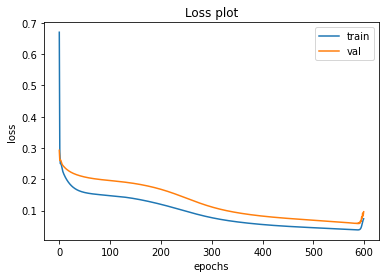

In [49]:
plot_loss(history)

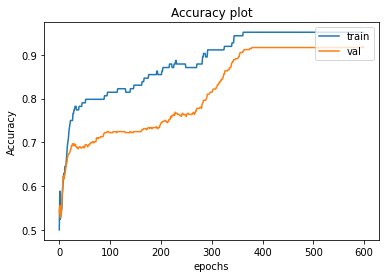

In [50]:
plot_accuracy(history)

In [51]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0739048|	0.95|
Test	|0.0965312|	0.92|


As we can see with the nesterov the model need more training epochs to achive the 100% accuracy

## Model 8

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [53]:
BATCH_SIZE = 32
NUM_EPOCHS=600

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [54]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
4/4 - 0s - loss: 0.3423 - accuracy: 0.5806 - val_loss: 0.2741 - val_accuracy: 0.5579
Epoch 2/600
4/4 - 0s - loss: 0.2842 - accuracy: 0.5161 - val_loss: 0.2341 - val_accuracy: 0.6088
Epoch 3/600
4/4 - 0s - loss: 0.2312 - accuracy: 0.6210 - val_loss: 0.2166 - val_accuracy: 0.6644
Epoch 4/600
4/4 - 0s - loss: 0.2041 - accuracy: 0.6855 - val_loss: 0.2094 - val_accuracy: 0.6991
Epoch 5/600
4/4 - 0s - loss: 0.1835 - accuracy: 0.7177 - val_loss: 0.2017 - val_accuracy: 0.6968
Epoch 6/600
4/4 - 0s - loss: 0.1723 - accuracy: 0.7500 - val_loss: 0.1998 - val_accuracy: 0.6968
Epoch 7/600
4/4 - 0s - loss: 0.1662 - accuracy: 0.7823 - val_loss: 0.1970 - val_accuracy: 0.7106
Epoch 8/600
4/4 - 0s - loss: 0.1632 - accuracy: 0.7742 - val_loss: 0.1976 - val_accuracy: 0.7083
Epoch 9/600
4/4 - 0s - loss: 0.1598 - accuracy: 0.7984 - val_loss: 0.1943 - val_accuracy: 0.7199
Epoch 10/600
4/4 - 0s - loss: 0.1575 - accuracy: 0.7823 - val_loss: 0.1909 - val_accuracy: 0.7106
Epoch 11/600
4/4 - 0s - loss:

Epoch 85/600
4/4 - 0s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 86/600
4/4 - 0s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 87/600
4/4 - 0s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 88/600
4/4 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 89/600
4/4 - 0s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 90/600
4/4 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 91/600
4/4 - 0s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 92/600
4/4 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 93/600
4/4 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 94/600
4/4 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 95/600
4/4 - 0

Epoch 168/600
4/4 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 169/600
4/4 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 170/600
4/4 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 171/600
4/4 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 172/600
4/4 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 173/600
4/4 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 174/600
4/4 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 175/600
4/4 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 176/600
4/4 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 177/600
4/4 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 178/

Epoch 250/600
4/4 - 0s - loss: 8.2958e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 251/600
4/4 - 0s - loss: 8.2449e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 252/600
4/4 - 0s - loss: 8.1721e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 253/600
4/4 - 0s - loss: 8.1517e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 254/600
4/4 - 0s - loss: 8.0809e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 255/600
4/4 - 0s - loss: 8.0450e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 256/600
4/4 - 0s - loss: 7.9569e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 257/600
4/4 - 0s - loss: 7.8916e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 258/600
4/4 - 0s - loss: 7.8377e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 259/600
4/4 - 0s - loss: 7.8705e-04 - accuracy: 1.0000 - val_loss: 

Epoch 329/600
4/4 - 0s - loss: 5.1155e-04 - accuracy: 1.0000 - val_loss: 8.4572e-04 - val_accuracy: 1.0000
Epoch 330/600
4/4 - 0s - loss: 5.0866e-04 - accuracy: 1.0000 - val_loss: 8.5901e-04 - val_accuracy: 1.0000
Epoch 331/600
4/4 - 0s - loss: 5.0812e-04 - accuracy: 1.0000 - val_loss: 8.4800e-04 - val_accuracy: 1.0000
Epoch 332/600
4/4 - 0s - loss: 5.0362e-04 - accuracy: 1.0000 - val_loss: 8.3284e-04 - val_accuracy: 1.0000
Epoch 333/600
4/4 - 0s - loss: 5.0152e-04 - accuracy: 1.0000 - val_loss: 8.3708e-04 - val_accuracy: 1.0000
Epoch 334/600
4/4 - 0s - loss: 5.0038e-04 - accuracy: 1.0000 - val_loss: 8.2946e-04 - val_accuracy: 1.0000
Epoch 335/600
4/4 - 0s - loss: 4.9964e-04 - accuracy: 1.0000 - val_loss: 8.2270e-04 - val_accuracy: 1.0000
Epoch 336/600
4/4 - 0s - loss: 5.0289e-04 - accuracy: 1.0000 - val_loss: 8.3972e-04 - val_accuracy: 1.0000
Epoch 337/600
4/4 - 0s - loss: 4.9599e-04 - accuracy: 1.0000 - val_loss: 8.2551e-04 - val_accuracy: 1.0000
Epoch 338/600
4/4 - 0s - loss: 4.9542

Epoch 406/600
4/4 - 0s - loss: 3.6738e-04 - accuracy: 1.0000 - val_loss: 6.2746e-04 - val_accuracy: 1.0000
Epoch 407/600
4/4 - 0s - loss: 3.6654e-04 - accuracy: 1.0000 - val_loss: 6.1438e-04 - val_accuracy: 1.0000
Epoch 408/600
4/4 - 0s - loss: 3.6455e-04 - accuracy: 1.0000 - val_loss: 6.1377e-04 - val_accuracy: 1.0000
Epoch 409/600
4/4 - 0s - loss: 3.6216e-04 - accuracy: 1.0000 - val_loss: 6.1780e-04 - val_accuracy: 1.0000
Epoch 410/600
4/4 - 0s - loss: 3.6158e-04 - accuracy: 1.0000 - val_loss: 6.1093e-04 - val_accuracy: 1.0000
Epoch 411/600
4/4 - 0s - loss: 3.6027e-04 - accuracy: 1.0000 - val_loss: 6.0921e-04 - val_accuracy: 1.0000
Epoch 412/600
4/4 - 0s - loss: 3.5957e-04 - accuracy: 1.0000 - val_loss: 6.1982e-04 - val_accuracy: 1.0000
Epoch 413/600
4/4 - 0s - loss: 3.5948e-04 - accuracy: 1.0000 - val_loss: 6.0049e-04 - val_accuracy: 1.0000
Epoch 414/600
4/4 - 0s - loss: 3.5969e-04 - accuracy: 1.0000 - val_loss: 6.0167e-04 - val_accuracy: 1.0000
Epoch 415/600
4/4 - 0s - loss: 3.5752

Epoch 483/600
4/4 - 0s - loss: 2.8443e-04 - accuracy: 1.0000 - val_loss: 4.8146e-04 - val_accuracy: 1.0000
Epoch 484/600
4/4 - 0s - loss: 2.8390e-04 - accuracy: 1.0000 - val_loss: 4.8342e-04 - val_accuracy: 1.0000
Epoch 485/600
4/4 - 0s - loss: 2.8208e-04 - accuracy: 1.0000 - val_loss: 4.8114e-04 - val_accuracy: 1.0000
Epoch 486/600
4/4 - 0s - loss: 2.8162e-04 - accuracy: 1.0000 - val_loss: 4.8062e-04 - val_accuracy: 1.0000
Epoch 487/600
4/4 - 0s - loss: 2.7982e-04 - accuracy: 1.0000 - val_loss: 4.7882e-04 - val_accuracy: 1.0000
Epoch 488/600
4/4 - 0s - loss: 2.7906e-04 - accuracy: 1.0000 - val_loss: 4.8064e-04 - val_accuracy: 1.0000
Epoch 489/600
4/4 - 0s - loss: 2.7859e-04 - accuracy: 1.0000 - val_loss: 4.7738e-04 - val_accuracy: 1.0000
Epoch 490/600
4/4 - 0s - loss: 2.7706e-04 - accuracy: 1.0000 - val_loss: 4.7718e-04 - val_accuracy: 1.0000
Epoch 491/600
4/4 - 0s - loss: 2.7613e-04 - accuracy: 1.0000 - val_loss: 4.7643e-04 - val_accuracy: 1.0000
Epoch 492/600
4/4 - 0s - loss: 2.7549

Epoch 560/600
4/4 - 0s - loss: 2.2920e-04 - accuracy: 1.0000 - val_loss: 3.9787e-04 - val_accuracy: 1.0000
Epoch 561/600
4/4 - 0s - loss: 2.2874e-04 - accuracy: 1.0000 - val_loss: 3.9692e-04 - val_accuracy: 1.0000
Epoch 562/600
4/4 - 0s - loss: 2.2860e-04 - accuracy: 1.0000 - val_loss: 3.9433e-04 - val_accuracy: 1.0000
Epoch 563/600
4/4 - 0s - loss: 2.2791e-04 - accuracy: 1.0000 - val_loss: 3.9632e-04 - val_accuracy: 1.0000
Epoch 564/600
4/4 - 0s - loss: 2.2735e-04 - accuracy: 1.0000 - val_loss: 3.9364e-04 - val_accuracy: 1.0000
Epoch 565/600
4/4 - 0s - loss: 2.2662e-04 - accuracy: 1.0000 - val_loss: 3.9379e-04 - val_accuracy: 1.0000
Epoch 566/600
4/4 - 0s - loss: 2.2654e-04 - accuracy: 1.0000 - val_loss: 3.8928e-04 - val_accuracy: 1.0000
Epoch 567/600
4/4 - 0s - loss: 2.2570e-04 - accuracy: 1.0000 - val_loss: 3.9390e-04 - val_accuracy: 1.0000
Epoch 568/600
4/4 - 0s - loss: 2.2515e-04 - accuracy: 1.0000 - val_loss: 3.8784e-04 - val_accuracy: 1.0000
Epoch 569/600
4/4 - 0s - loss: 2.2489

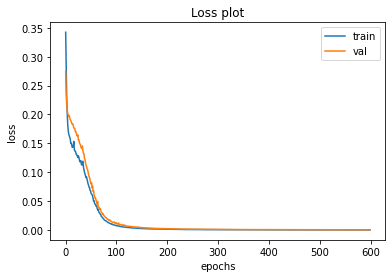

In [55]:
plot_loss(history)

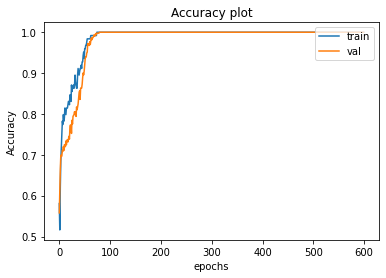

In [56]:
plot_accuracy(history)

In [57]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0002085|	1.00|
Test	|0.0003609|	1.00|


With a batch_size=32 the model converge in a faster way

## Model 8

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [69]:
BATCH_SIZE = 1
NUM_EPOCHS=100

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

In [70]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/100
124/124 - 0s - loss: 0.3687 - accuracy: 0.5403 - val_loss: 0.2625 - val_accuracy: 0.5694
Epoch 2/100
124/124 - 0s - loss: 0.3216 - accuracy: 0.5806 - val_loss: 0.2953 - val_accuracy: 0.6435
Epoch 3/100
124/124 - 0s - loss: 0.3398 - accuracy: 0.5645 - val_loss: 0.3885 - val_accuracy: 0.5000
Epoch 4/100
124/124 - 0s - loss: 0.3382 - accuracy: 0.6290 - val_loss: 0.2311 - val_accuracy: 0.5880
Epoch 5/100
124/124 - 0s - loss: 0.2616 - accuracy: 0.6774 - val_loss: 0.3947 - val_accuracy: 0.4722
Epoch 6/100
124/124 - 0s - loss: 0.2413 - accuracy: 0.6855 - val_loss: 0.2521 - val_accuracy: 0.6088
Epoch 7/100
124/124 - 0s - loss: 0.1864 - accuracy: 0.7339 - val_loss: 0.1886 - val_accuracy: 0.7361
Epoch 8/100
124/124 - 0s - loss: 0.2197 - accuracy: 0.7419 - val_loss: 0.1561 - val_accuracy: 0.7847
Epoch 9/100
124/124 - 0s - loss: 0.1164 - accuracy: 0.8710 - val_loss: 0.1135 - val_accuracy: 0.8426
Epoch 10/100
124/124 - 0s - loss: 0.0873 - accuracy: 0.9113 - val_loss: 0.1373 - val_accura

124/124 - 0s - loss: 7.3670e-04 - accuracy: 1.0000 - val_loss: 4.0006e-04 - val_accuracy: 1.0000
Epoch 82/100
124/124 - 0s - loss: 4.4053e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 83/100
124/124 - 0s - loss: 8.7355e-04 - accuracy: 1.0000 - val_loss: 3.3219e-04 - val_accuracy: 1.0000
Epoch 84/100
124/124 - 0s - loss: 5.3491e-04 - accuracy: 1.0000 - val_loss: 3.1257e-04 - val_accuracy: 1.0000
Epoch 85/100
124/124 - 0s - loss: 3.7755e-04 - accuracy: 1.0000 - val_loss: 7.1963e-04 - val_accuracy: 1.0000
Epoch 86/100
124/124 - 0s - loss: 5.3516e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 87/100
124/124 - 0s - loss: 9.1130e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 88/100
124/124 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 89/100
124/124 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 90/100
124/124 - 0s - loss: 0.0017 - accuracy

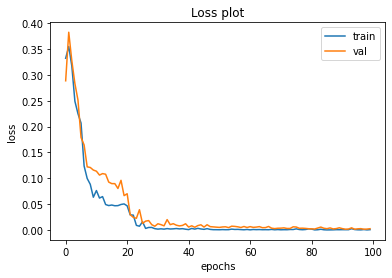

In [62]:
plot_loss(history)

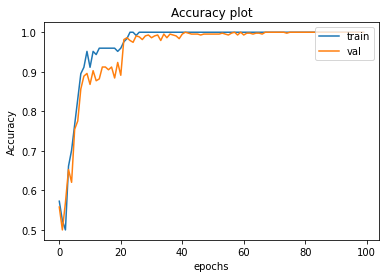

In [63]:
plot_accuracy(history)

In [64]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0007890|	1.00|
Test	|0.0026306|	1.00|
